# Check Umiujac TUNDRA validation files

Downloaded from https://doi.pangaea.de/10.1594/PANGAEA.964743 the 27/02/2024 by Mickaël Lalande

- Article (Lackner et al., 2022) : https://tc.copernicus.org/articles/16/3357/2022/
- Données : https://doi.pangaea.de/10.1594/PANGAEA.964743 (updated by Florent)

CLASSIC forcing: https://cccma.gitlab.io/classic/basicInputs.html

Coverage:	LATITUDE: 56.559167 * LONGITUDE: -76.482056
	DATE/TIME START: 2012-09-28T04:00:00 * DATE/TIME END: 2021-10-15T21:00:00
	MINIMUM ELEVATION: 133.0 m * MAXIMUM ELEVATION: 133.0 m
Event(s):	Umiujaq_2012-2021_Tundra * LATITUDE: 56.559167 * LONGITUDE: -76.482056 * DATE/TIME START: 2012-09-28T17:00:00 * DATE/TIME END: 2021-10-19T10:00:00 * ELEVATION: 133.0 m * LOCATION: Hudson Bay * METHOD/DEVICE: Field measurement

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures

## Umiujaq tundra, northeastern Canada

In [14]:
obs_manon = xr.open_dataset('../script_albedo_manon/obs_insitu_umq.nc')
obs_manon

<xarray.Dataset> Size: 1MB
Dimensions:  (time: 69487)
Coordinates:
  * time     (time) datetime64[ns] 556kB 2012-09-28T17:00:00 ... 2020-09-01T2...
Data variables:
    snd_man  (time) float32 278kB ...
    albs     (time) float32 278kB ...

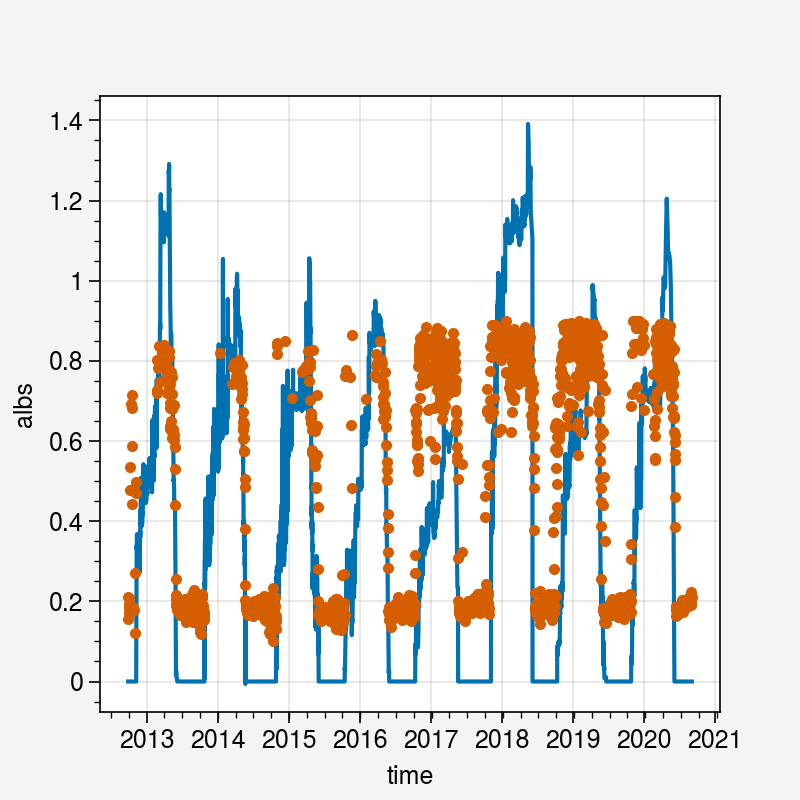

In [21]:
%matplotlib inline
obs_manon.snd_man.plot()
obs_manon.albs.plot(marker='.')

In [7]:
path_obs_2 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Lackner_etal_2022/datasets'
df_sd_2 = pd.read_csv(path_obs_2+'/Umiujaq_snow_height.tab', skiprows=21, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_sd_2

Event  Snow h [m] Vegetation type
Date/Time                                                                
2012-09-28 17:00:00  Umiujaq_2012-2021_Tundra       0.000          tundra
2012-09-28 18:00:00  Umiujaq_2012-2021_Tundra       0.000          tundra
2012-09-28 19:00:00  Umiujaq_2012-2021_Tundra       0.000          tundra
2012-09-28 20:00:00  Umiujaq_2012-2021_Tundra       0.000          tundra
2012-09-28 21:00:00  Umiujaq_2012-2021_Tundra       0.000          tundra
...                                       ...         ...             ...
2021-10-19 05:00:00  Umiujaq_2015-2021_Forest       0.053          forest
2021-10-19 06:00:00  Umiujaq_2015-2021_Forest       0.034          forest
2021-10-19 07:00:00  Umiujaq_2015-2021_Forest       0.439          forest
2021-10-19 08:00:00  Umiujaq_2015-2021_Forest       0.045          forest
2021-10-19 09:00:00  Umiujaq_2015-2021_Forest       0.043          forest

[158675 rows x 3 columns]

In [8]:
path_obs = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets'
df_sd = pd.read_csv(path_obs+'/Umiujaq_snow_height.tab', skiprows=26, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_sd

Event  Snow h [m]
Date/Time                                                
2012-09-28 21:00:00  Umiujaq_2012-2021_Tundra       0.000
2012-09-28 22:00:00  Umiujaq_2012-2021_Tundra       0.000
2012-09-28 23:00:00  Umiujaq_2012-2021_Tundra       0.000
2012-09-29 00:00:00  Umiujaq_2012-2021_Tundra       0.000
2012-09-29 01:00:00  Umiujaq_2012-2021_Tundra       0.000
...                                       ...         ...
2021-10-19 09:00:00  Umiujaq_2015-2021_Forest       0.053
2021-10-19 10:00:00  Umiujaq_2015-2021_Forest       0.034
2021-10-19 11:00:00  Umiujaq_2015-2021_Forest       0.439
2021-10-19 12:00:00  Umiujaq_2015-2021_Forest       0.045
2021-10-19 13:00:00  Umiujaq_2015-2021_Forest       0.043

[130992 rows x 2 columns]

In [24]:
# Find index limit forest/tundra
i_lim = 79338
df_sd_2['Event'][:i_lim+2]

Date/Time
2012-09-28 17:00:00    Umiujaq_2012-2021_Tundra
2012-09-28 18:00:00    Umiujaq_2012-2021_Tundra
2012-09-28 19:00:00    Umiujaq_2012-2021_Tundra
2012-09-28 20:00:00    Umiujaq_2012-2021_Tundra
2012-09-28 21:00:00    Umiujaq_2012-2021_Tundra
                                 ...           
2021-10-19 08:00:00    Umiujaq_2012-2021_Tundra
2021-10-19 09:00:00    Umiujaq_2012-2021_Tundra
2021-10-19 10:00:00    Umiujaq_2012-2021_Tundra
2012-09-28 17:00:00    Umiujaq_2015-2021_Forest
2012-09-28 18:00:00    Umiujaq_2015-2021_Forest
Name: Event, Length: 79340, dtype: object

In [9]:
# Find index limit forest/tundra
i_lim = 79338
df_sd['Event'][:i_lim+2]

Date/Time
2012-09-28 21:00:00    Umiujaq_2012-2021_Tundra
2012-09-28 22:00:00    Umiujaq_2012-2021_Tundra
2012-09-28 23:00:00    Umiujaq_2012-2021_Tundra
2012-09-29 00:00:00    Umiujaq_2012-2021_Tundra
2012-09-29 01:00:00    Umiujaq_2012-2021_Tundra
                                 ...           
2015-11-26 05:00:00    Umiujaq_2012-2021_Tundra
2015-11-26 06:00:00    Umiujaq_2012-2021_Tundra
2015-11-26 07:00:00    Umiujaq_2012-2021_Tundra
2015-11-26 08:00:00    Umiujaq_2015-2021_Forest
2015-11-26 09:00:00    Umiujaq_2015-2021_Forest
Name: Event, Length: 79340, dtype: object

In [10]:
site = 'umt'
site_longname = 'Umiujaq TUNDRA, northeastern Canada'

year_start = '2012'
year_end = '2021'
ds_forcing = xr.open_dataset(path_obs+'/met_insitu_'+site+'_'+year_start+'_'+year_end+'.nc')
ds_forcing

<xarray.Dataset> Size: 6MB
Dimensions:    (time: 79403)
Coordinates:
  * time       (time) datetime64[ns] 635kB 2012-09-28 ... 2021-10-19T10:00:00
Data variables:
    Rainf      (time) float64 635kB ...
    Snowf      (time) float64 635kB ...
    TotPrecip  (time) float64 635kB ...
    SWdown     (time) float64 635kB ...
    LWdown     (time) float64 635kB ...
    Tair       (time) float64 635kB ...
    Wind       (time) float64 635kB ...
    Psurf      (time) float64 635kB ...
    Qair       (time) float64 635kB ...

In [5]:
site_longname

'Umiujaq TUNDRA, northeastern Canada'

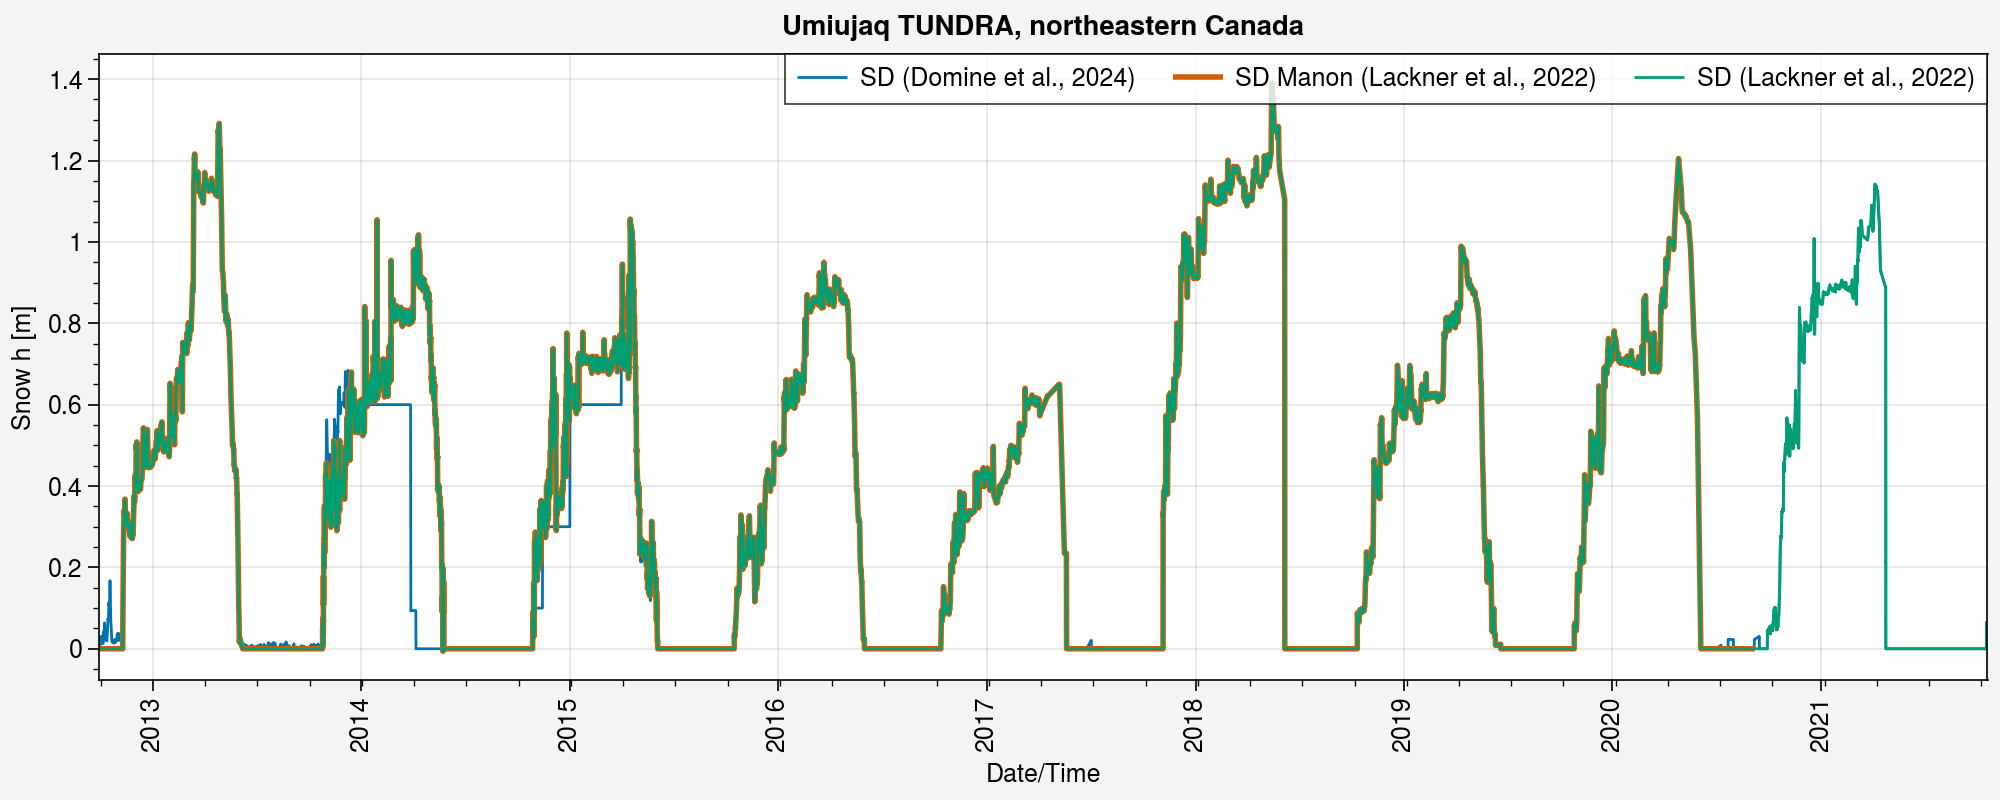

In [38]:
%matplotlib inline
fig, axs = pplt.subplots(figsize=(10,4))

period=slice('2019-09', '2019-12')

ax = axs[0]
ax.plot(df_sd['Snow h [m]'][:79338-4], label='SD (Domine et al., 2024)', lw=1)
# ax.plot(df_sd['Snow h [m]'][79338:], label='SD FOREST (Domine et al., 2024)', lw=1)
ax.plot(obs_manon.snd_man, label='SD Manon (Lackner et al., 2022)', lw=2)
ax.plot(df_sd_2['Snow h [m]'][:79338-4], label='SD (Lackner et al., 2022)', lw=1)


# ox = ax.alty(color='gray')
# ox.plot(ds_forcing.Snowf, label='Precip', color='gray', lw=0.2)

# ax.format(xlim=(ds_forcing.sel(time='2019-09-01').time[0], ds_forcing.sel(time='2019-12-01').time[0]),
#          ylim=(0, 1))

# ox.format(ylim=(0, 0.006))
fig.suptitle('Umiujaq TUNDRA, northeastern Canada')

ax.legend()

fig.save('Umiujac_TUNDRA_SD_comparison.pdf')

In [40]:
df_tundra = df_sd[:79338-4]
df_forest = df_sd[79338:]

In [44]:
df_tundra_2 = df_sd_2[:79338-4]
df_forest_2 = df_sd_2[79338:]

In [41]:
df_tundra

Event  Snow h [m]
Date/Time                                                
2012-09-28 21:00:00  Umiujaq_2012-2021_Tundra      0.0000
2012-09-28 22:00:00  Umiujaq_2012-2021_Tundra      0.0000
2012-09-28 23:00:00  Umiujaq_2012-2021_Tundra      0.0000
2012-09-29 00:00:00  Umiujaq_2012-2021_Tundra      0.0000
2012-09-29 01:00:00  Umiujaq_2012-2021_Tundra      0.0000
...                                       ...         ...
2021-10-19 06:00:00  Umiujaq_2012-2021_Tundra      0.0587
2021-10-19 07:00:00  Umiujaq_2012-2021_Tundra      0.0585
2021-10-19 08:00:00  Umiujaq_2012-2021_Tundra      0.0579
2021-10-19 09:00:00  Umiujaq_2012-2021_Tundra      0.0575
2021-10-19 10:00:00  Umiujaq_2012-2021_Tundra      0.0568

[79334 rows x 2 columns]

In [45]:
df_tundra_2

Event  Snow h [m] Vegetation type
Date/Time                                                                
2012-09-28 17:00:00  Umiujaq_2012-2021_Tundra      0.0000          tundra
2012-09-28 18:00:00  Umiujaq_2012-2021_Tundra      0.0000          tundra
2012-09-28 19:00:00  Umiujaq_2012-2021_Tundra      0.0000          tundra
2012-09-28 20:00:00  Umiujaq_2012-2021_Tundra      0.0000          tundra
2012-09-28 21:00:00  Umiujaq_2012-2021_Tundra      0.0000          tundra
...                                       ...         ...             ...
2021-10-19 02:00:00  Umiujaq_2012-2021_Tundra      0.0587          tundra
2021-10-19 03:00:00  Umiujaq_2012-2021_Tundra      0.0584          tundra
2021-10-19 04:00:00  Umiujaq_2012-2021_Tundra      0.0579          tundra
2021-10-19 05:00:00  Umiujaq_2012-2021_Tundra      0.0574          tundra
2021-10-19 06:00:00  Umiujaq_2012-2021_Tundra      0.0568          tundra

[79334 rows x 3 columns]

In [42]:
df_forest

Event  Snow h [m]
Date/Time                                                
2015-11-26 08:00:00  Umiujaq_2015-2021_Forest       0.249
2015-11-26 09:00:00  Umiujaq_2015-2021_Forest       0.251
2015-11-26 10:00:00  Umiujaq_2015-2021_Forest       0.256
2015-11-26 11:00:00  Umiujaq_2015-2021_Forest       0.256
2015-11-26 12:00:00  Umiujaq_2015-2021_Forest       0.255
...                                       ...         ...
2021-10-19 09:00:00  Umiujaq_2015-2021_Forest       0.053
2021-10-19 10:00:00  Umiujaq_2015-2021_Forest       0.034
2021-10-19 11:00:00  Umiujaq_2015-2021_Forest       0.439
2021-10-19 12:00:00  Umiujaq_2015-2021_Forest       0.045
2021-10-19 13:00:00  Umiujaq_2015-2021_Forest       0.043

[51654 rows x 2 columns]

In [46]:
df_forest_2

Event  Snow h [m] Vegetation type
Date/Time                                                                
2012-09-28 17:00:00  Umiujaq_2015-2021_Forest         NaN          forest
2012-09-28 18:00:00  Umiujaq_2015-2021_Forest         NaN          forest
2012-09-28 19:00:00  Umiujaq_2015-2021_Forest         NaN          forest
2012-09-28 20:00:00  Umiujaq_2015-2021_Forest         NaN          forest
2012-09-28 21:00:00  Umiujaq_2015-2021_Forest         NaN          forest
...                                       ...         ...             ...
2021-10-19 05:00:00  Umiujaq_2015-2021_Forest       0.053          forest
2021-10-19 06:00:00  Umiujaq_2015-2021_Forest       0.034          forest
2021-10-19 07:00:00  Umiujaq_2015-2021_Forest       0.439          forest
2021-10-19 08:00:00  Umiujaq_2015-2021_Forest       0.045          forest
2021-10-19 09:00:00  Umiujaq_2015-2021_Forest       0.043          forest

[79337 rows x 3 columns]

In [43]:
ds_tundra = df_tundra.drop(columns='Event').to_xarray()
ds_tundra = ds_tundra.rename({'Date/Time': 'time', 'Snow h [m]': 'snd_auto'})
ds_tundra.snd_auto.attrs = {'name': 'Snow h', 'unit': 'm'}
ds_tundra.attrs = {
    'event': 'Umiujaq_2012-2021_Tundra',
    'link': 'https://doi.pangaea.de/10.1594/PANGAEA.964743',
    'downloaded': '27/02/2024 by Mickaël Lalande',
    'original_file': 'Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiujaq_soil_temp_water.tab'
}
ds_tundra

<xarray.Dataset> Size: 1MB
Dimensions:   (time: 79334)
Coordinates:
  * time      (time) datetime64[ns] 635kB 2012-09-28T21:00:00 ... 2021-10-19T...
Data variables:
    snd_auto  (time) float64 635kB 0.0 0.0 0.0 0.0 ... 0.0579 0.0575 0.0568
Attributes:
    event:          Umiujaq_2012-2021_Tundra
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

In [47]:
ds_tundra_2 = df_tundra_2.drop(columns='Event').to_xarray()
ds_tundra_2 = ds_tundra_2.rename({'Date/Time': 'time', 'Snow h [m]': 'snd_auto'})
ds_tundra_2.snd_auto.attrs = {'name': 'Snow h', 'unit': 'm'}
ds_tundra_2.attrs = {
    'event': 'Umiujaq_2012-2021_Tundra',
    'link': 'https://doi.org/10.1594/PANGAEA.946538',
    'downloaded': '27/02/2024 by Mickaël Lalande',
    'original_file': 'Lackner_etal_2022/datasets/Umiujaq_snow_height.tab, Umiujaq_soil_temp_water.tab'
}
ds_tundra_2

<xarray.Dataset> Size: 2MB
Dimensions:          (time: 79334)
Coordinates:
  * time             (time) datetime64[ns] 635kB 2012-09-28T17:00:00 ... 2021...
Data variables:
    snd_auto         (time) float64 635kB 0.0 0.0 0.0 ... 0.0579 0.0574 0.0568
    Vegetation type  (time) object 635kB 'tundra' 'tundra' ... 'tundra' 'tundra'
Attributes:
    event:          Umiujaq_2012-2021_Tundra
    link:           https://doi.org/10.1594/PANGAEA.946538
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Lackner_etal_2022/datasets/Umiujaq_snow_height.tab, Umiuj...

## Albedo

In [57]:
df_rad_tundra_2 = pd.read_csv(path_obs_2+'/Umiujaq_rad_tundra.tab', skiprows=25, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_rad_tundra_2

SWD [W/m**2]  QF SWD  SWU [W/m**2]  QF SWU  LWD [W/m**2]  \
Date/Time                                                                       
2012-09-28 17:00:00       47.0003     0.0        7.8887       0      325.5586   
2012-09-28 18:00:00        0.0000     1.0        0.0000       1      310.6522   
2012-09-28 19:00:00        0.0000     1.0        0.0000       1      314.3521   
2012-09-28 20:00:00        0.0000     NaN        0.0000       1      310.4392   
2012-09-28 21:00:00        0.0000     1.0        0.0000       1      331.2799   
...                           ...     ...           ...     ...           ...   
2021-10-14 19:00:00        0.0000     1.0        0.0000       1      262.9645   
2021-10-14 20:00:00        0.0000     1.0        0.0000       1      266.9016   
2021-10-14 21:00:00        0.0000     1.0        0.0000       1      269.9741   
2021-10-14 22:00:00        0.0000     1.0        0.0000       1      275.4474   
2021-10-14 23:00:00        0.0000     1.0        0.0000       1      265.9428   

                     QF LWD  LWU [W/m**2]  QF LWU  
Date/Time                                          
2012-09-28 17:00:00       0      355.4142       0  
2012-09-28 18:00:00       0      346.5631       0  
2012-09-28 19:00:00       0      338.1104       0  
2012-09-28 20:00:00       0      342.4359       0  
2012-09-28 21:00:00       0      344.8521       0  
...                     ...           ...     ...  
2021-10-14 19:00:00       0      336.1100       0  
2021-10-14 20:00:00       0      332.4910       0  
2021-10-14 21:00:00       0      330.9600       0  
2021-10-14 22:00:00       0      329.8782       0  
2021-10-14 23:00:00       0      327.5981       0  

[79279 rows x 8 columns]

In [54]:
df_rad_tundra = pd.read_csv(path_obs+'/Umiujaq_rad_tundra.tab', skiprows=31, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_rad_tundra

SWD [W/m**2]  QF SWD  SWU [W/m**2]  QF SWU  LWD [W/m**2]  \
Date/Time                                                                       
2012-09-28 21:00:00        36.868       0         3.310       0       325.559   
2012-09-28 22:00:00         0.000       0         0.000       0       310.652   
2012-09-28 23:00:00         0.000       0         0.000       0       314.352   
2012-09-29 00:00:00         0.000       0         0.000       0       310.439   
2012-09-29 01:00:00         0.000       0         0.000       0       331.280   
...                           ...     ...           ...     ...           ...   
2021-10-19 10:00:00         0.000       0         0.000       0           NaN   
2021-10-19 11:00:00         5.840       0         0.000       0           NaN   
2021-10-19 12:00:00        51.647       0        10.697       0           NaN   
2021-10-19 13:00:00       128.998       0        27.978       0           NaN   
2021-10-19 14:00:00       368.730       0        91.065       0           NaN   

                     QF LWD  LWU [W/m**2]  QF LWU  
Date/Time                                          
2012-09-28 21:00:00     0.0       355.414     0.0  
2012-09-28 22:00:00     0.0       346.563     0.0  
2012-09-28 23:00:00     0.0       338.110     0.0  
2012-09-29 00:00:00     0.0       342.436     0.0  
2012-09-29 01:00:00     0.0       344.852     0.0  
...                     ...           ...     ...  
2021-10-19 10:00:00     NaN           NaN     NaN  
2021-10-19 11:00:00     NaN           NaN     NaN  
2021-10-19 12:00:00     NaN           NaN     NaN  
2021-10-19 13:00:00     NaN           NaN     NaN  
2021-10-19 14:00:00     NaN           NaN     NaN  

[79386 rows x 8 columns]

<AxesSubplot:xlabel='Date/Time'>

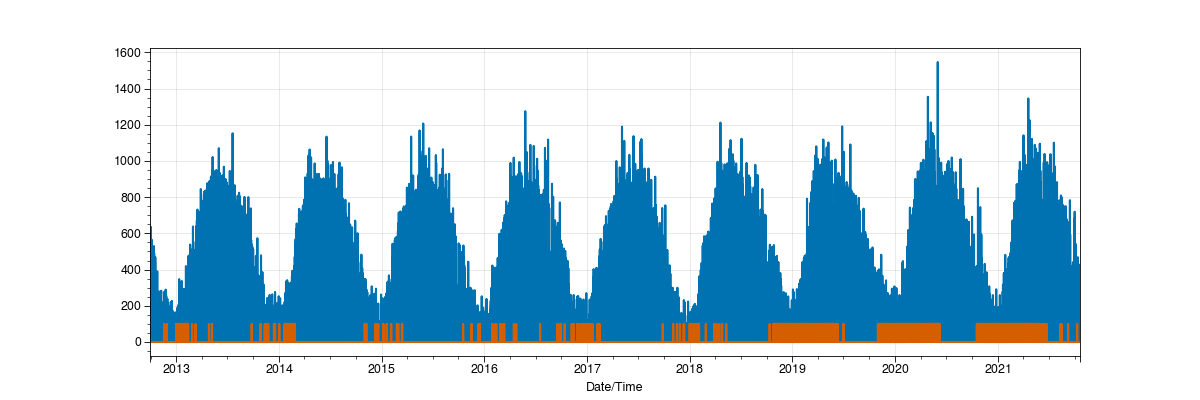

In [60]:
%matplotlib widget
df_rad_tundra['SWD [W/m**2]'].plot(figsize=(12, 4))
(df_rad_tundra['QF SWD']*100).plot()

<AxesSubplot:xlabel='Date/Time'>

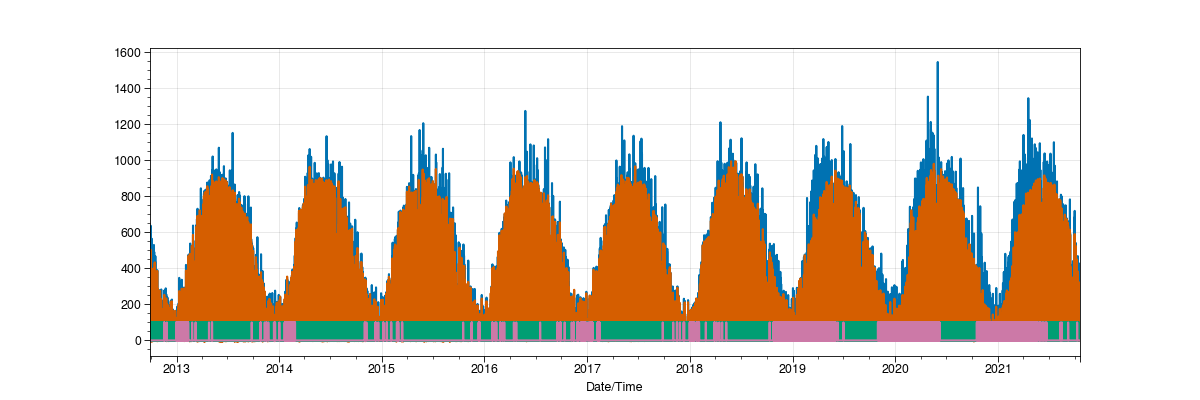

In [64]:
%matplotlib widget
df_rad_tundra['SWD [W/m**2]'].plot(figsize=(12, 4))
df_rad_tundra_2['SWD [W/m**2]'].plot(figsize=(12, 4))
(df_rad_tundra_2['QF SWD']*100).plot()
(df_rad_tundra['QF SWD']*100).plot()

In [78]:
df_rad_tundra['SWD [W/m**2]'].resample('D').mean()

Date/Time
2012-09-28     12.289333
2012-09-29     24.119542
2012-09-30    142.551292
2012-10-01    120.477292
2012-10-02     27.283125
                 ...    
2021-10-15     60.592833
2021-10-16     30.496083
2021-10-17     23.834833
2021-10-18     28.319833
2021-10-19     37.014333
Freq: D, Name: SWD [W/m**2], Length: 3309, dtype: float64

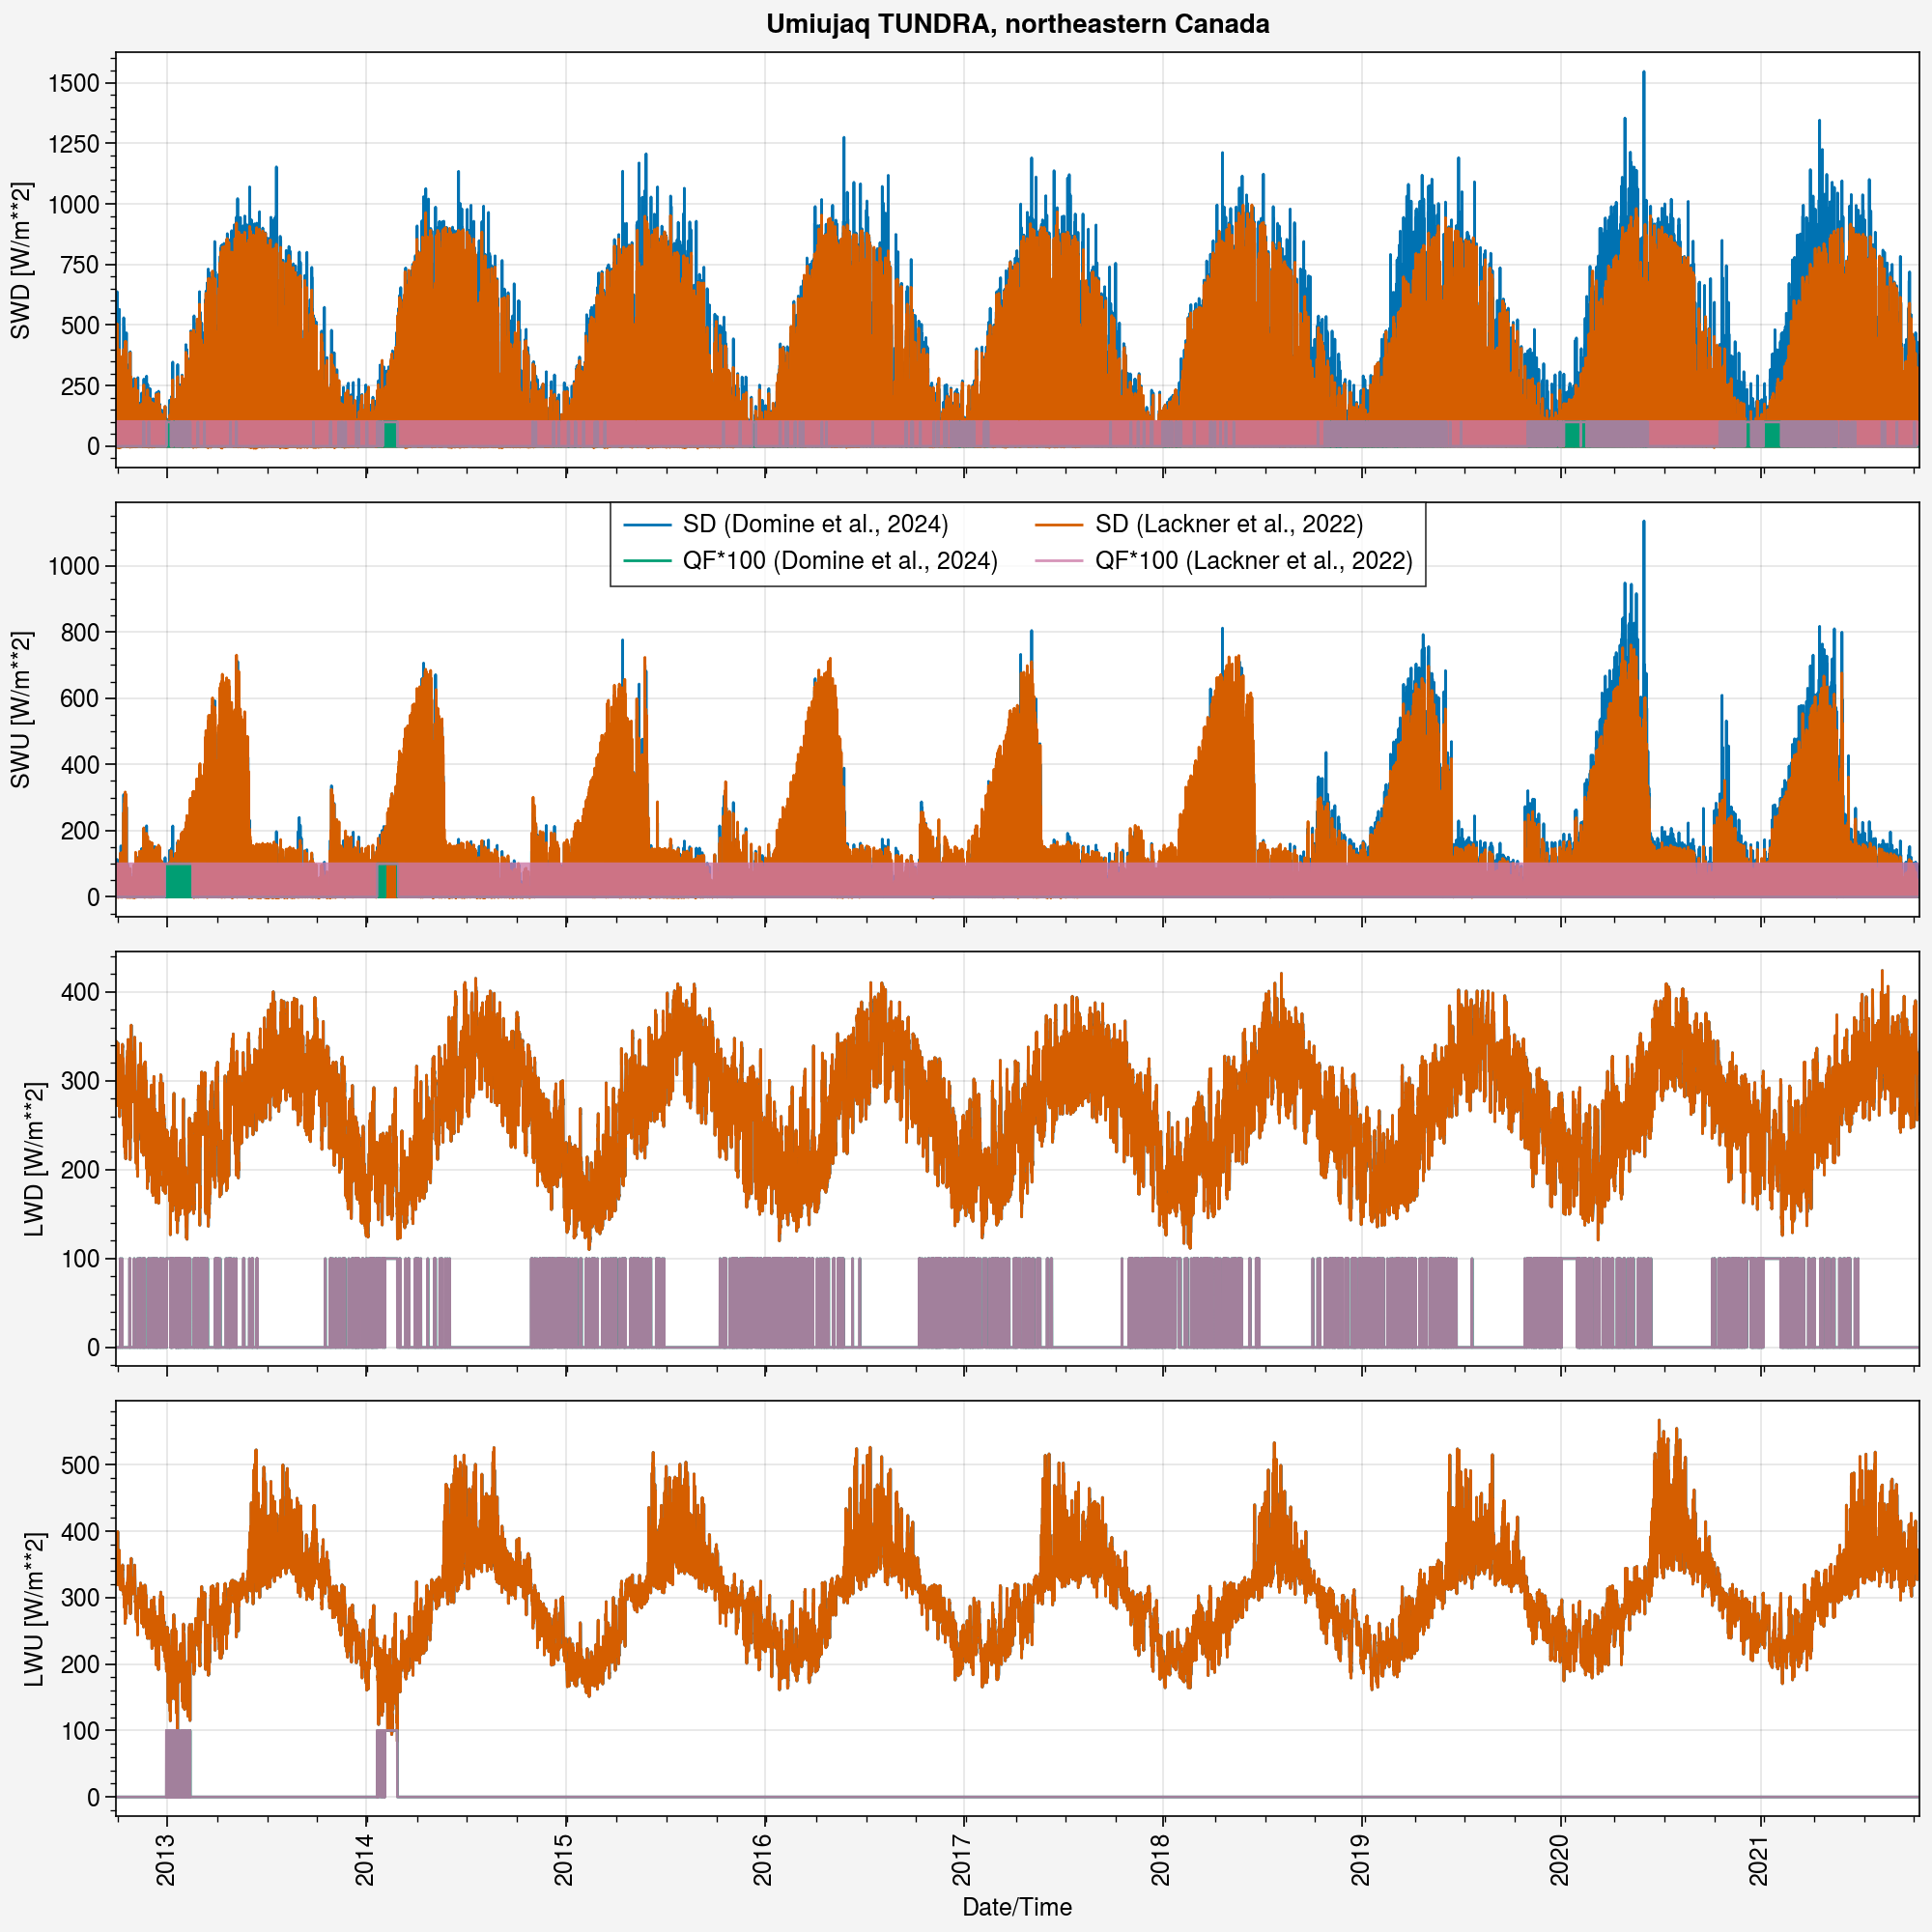

In [159]:
%matplotlib inline
fig, axs = pplt.subplots(nrows=4, figsize=(10,10), sharey=0)

period=slice('2019-09', '2019-12')

ax = axs[0]
ax.plot(df_rad_tundra['SWD [W/m**2]'], label='SD (Domine et al., 2024)', lw=1)
ax.plot(df_rad_tundra_2['SWD [W/m**2]'], label='SD (Lackner et al., 2022)', lw=1)

ax.plot(df_rad_tundra['QF SWD']*100, label='QF*100 (Domine et al., 2024)', lw=1)
ax.plot(df_rad_tundra_2['QF SWD']*100, label='QF*100 (Lackner et al., 2022)', lw=1, alpha=0.8)



ax = axs[1]
ax.plot(df_rad_tundra['SWU [W/m**2]'], label='SD (Domine et al., 2024)', lw=1)
ax.plot(df_rad_tundra_2['SWU [W/m**2]'], label='SD (Lackner et al., 2022)', lw=1)

ax.plot(df_rad_tundra['QF SWU']*100, label='QF*100 (Domine et al., 2024)', lw=1)
ax.plot(df_rad_tundra_2['QF SWU']*100, label='QF*100 (Lackner et al., 2022)', lw=1, alpha=0.8)


ax = axs[2]
ax.plot(df_rad_tundra['LWD [W/m**2]'], label='SD (Domine et al., 2024)', lw=1)
ax.plot(df_rad_tundra_2['LWD [W/m**2]'], label='SD (Lackner et al., 2022)', lw=1)

ax.plot(df_rad_tundra['QF LWD']*100, label='QF*100 (Domine et al., 2024)', lw=1)
ax.plot(df_rad_tundra_2['QF LWD']*100, label='QF*100 (Lackner et al., 2022)', lw=1, alpha=0.8)

ax = axs[3]
ax.plot(df_rad_tundra['LWU [W/m**2]'], label='SD (Domine et al., 2024)', lw=1)
ax.plot(df_rad_tundra_2['LWU [W/m**2]'], label='SD (Lackner et al., 2022)', lw=1)

ax.plot(df_rad_tundra['QF LWU']*100, label='QF*100 (Domine et al., 2024)', lw=1)
ax.plot(df_rad_tundra_2['QF LWU']*100, label='QF*100 (Lackner et al., 2022)', lw=1, alpha=0.8)


fig.suptitle('Umiujaq TUNDRA, northeastern Canada')

axs[1].legend(ncols=2, loc='uc')

# fig.save('Umiujac_TUNDRA_rad_comparison.pdf')

<AxesSubplot:xlabel='Date/Time'>

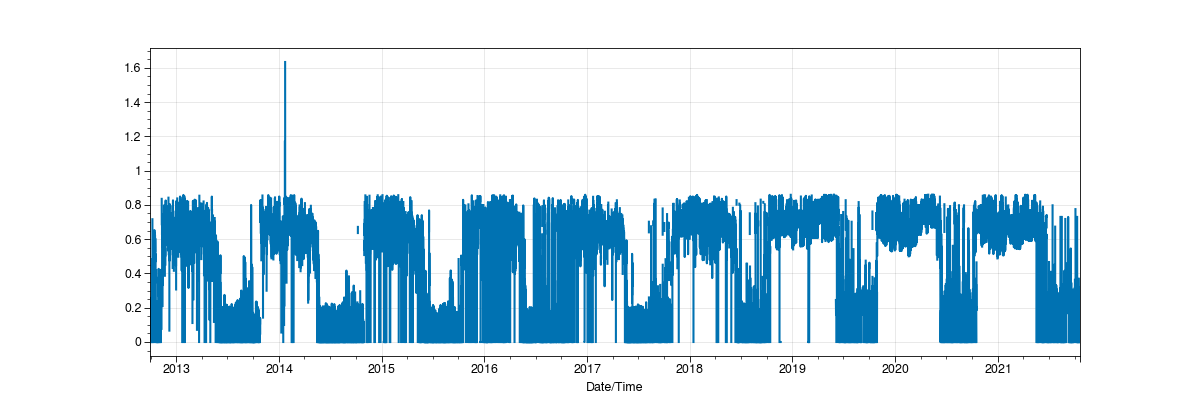

In [94]:
%matplotlib widget
(df_rad_tundra['SWU [W/m**2]'] / df_rad_tundra['SWD [W/m**2]']).plot(figsize=(12, 4))

In [ ]:
df_rad_tundra['SWD [W/m**2]']

### Manon albedo computation

<AxesSubplot:xlabel='Date/Time'>

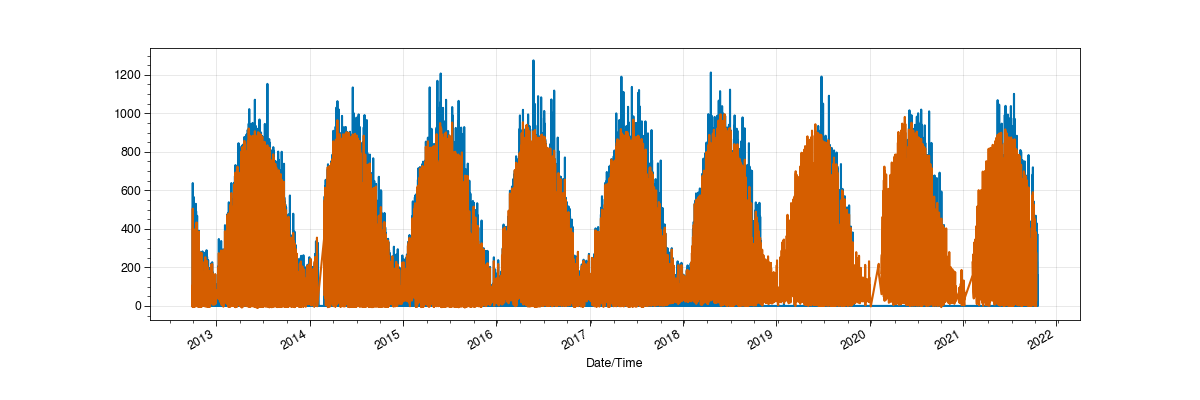

In [96]:
%matplotlib widget
df_rad_tundra['SWD [W/m**2]'][df_rad_tundra['QF SWD'] == 0].plot(figsize=(12, 4))
df_rad_tundra_2['SWD [W/m**2]'][df_rad_tundra_2['QF SWD'] == 0].plot()
# df_rad_tundra_2['SWD [W/m**2]'].plot(figsize=(12, 4))
# (df_rad_tundra_2['QF SWD']*100).plot()
# (df_rad_tundra['QF SWD']*100).plot()

In [97]:
df_rad_tundra['SWD [W/m**2]'][df_rad_tundra['QF SWD'] == 0]

Date/Time
2012-09-28 21:00:00     36.868
2012-09-28 22:00:00      0.000
2012-09-28 23:00:00      0.000
2012-09-29 00:00:00      0.000
2012-09-29 01:00:00      0.000
                        ...   
2021-10-19 10:00:00      0.000
2021-10-19 11:00:00      5.840
2021-10-19 12:00:00     51.647
2021-10-19 13:00:00    128.998
2021-10-19 14:00:00    368.730
Name: SWD [W/m**2], Length: 71483, dtype: float64

In [157]:
df_rad_tundra_2['SWD [W/m**2]'][df_rad_tundra_2['QF SWD'] == 0]

Date/Time
2012-09-28 17:00:00     47.0003
2012-09-29 06:00:00     -3.6829
2012-09-29 07:00:00      6.7754
2012-09-29 08:00:00     17.2337
2012-09-29 09:00:00     39.9419
                         ...   
2021-10-13 13:00:00    189.1767
2021-10-13 14:00:00    177.6579
2021-10-13 15:00:00    148.9029
2021-10-13 16:00:00     73.1069
2021-10-13 17:00:00     30.6280
Name: SWD [W/m**2], Length: 36608, dtype: float64

In [98]:
df_rad_tundra['SWD [W/m**2]'][df_rad_tundra['QF SWD'] == 0].to_xarray()

<xarray.DataArray 'SWD [W/m**2]' (Date/Time: 71483)> Size: 572kB
array([ 36.868,   0.   ,   0.   , ...,  51.647, 128.998, 368.73 ])
Coordinates:
  * Date/Time  (Date/Time) datetime64[ns] 572kB 2012-09-28T21:00:00 ... 2021-...

In [99]:
glob = df_rad_tundra['SWD [W/m**2]'][df_rad_tundra['QF SWD'] == 0].to_xarray()
glob = glob.rename({'Date/Time': 'time'})
glob

<xarray.DataArray 'SWD [W/m**2]' (time: 71483)> Size: 572kB
array([ 36.868,   0.   ,   0.   , ...,  51.647, 128.998, 368.73 ])
Coordinates:
  * time     (time) datetime64[ns] 572kB 2012-09-28T21:00:00 ... 2021-10-19T1...

In [155]:
glob

<xarray.DataArray 'SWD [W/m**2]' (time: 71483)> Size: 572kB
array([ 36.868,   0.   ,   0.   , ...,  51.647, 128.998, 368.73 ])
Coordinates:
  * time     (time) datetime64[ns] 572kB 2012-09-28T21:00:00 ... 2021-10-19T1...

In [154]:
glob_2

<xarray.DataArray 'SWD [W/m**2]' (time: 36608)> Size: 293kB
array([ 47.0003,  -3.6829,   6.7754, ..., 148.9029,  73.1069,  30.628 ])
Coordinates:
  * time     (time) datetime64[ns] 293kB 2012-09-28T17:00:00 ... 2021-10-13T1...

In [101]:
glob_2 = df_rad_tundra_2['SWD [W/m**2]'][df_rad_tundra_2['QF SWD'] == 0].to_xarray()
glob_2 = glob_2.rename({'Date/Time': 'time'})
glob_2

<xarray.DataArray 'SWD [W/m**2]' (time: 36608)> Size: 293kB
array([ 47.0003,  -3.6829,   6.7754, ..., 148.9029,  73.1069,  30.628 ])
Coordinates:
  * time     (time) datetime64[ns] 293kB 2012-09-28T17:00:00 ... 2021-10-13T1...

In [100]:
ref = df_rad_tundra['SWU [W/m**2]'][df_rad_tundra['QF SWU'] == 0].to_xarray()
ref = ref.rename({'Date/Time': 'time'})
ref

<xarray.DataArray 'SWU [W/m**2]' (time: 78206)> Size: 626kB
array([ 3.31 ,  0.   ,  0.   , ..., 10.697, 27.978, 91.065])
Coordinates:
  * time     (time) datetime64[ns] 626kB 2012-09-28T21:00:00 ... 2021-10-19T1...

In [102]:
ref_2 = df_rad_tundra_2['SWU [W/m**2]'][df_rad_tundra_2['QF SWU'] == 0].to_xarray()
ref_2 = ref_2.rename({'Date/Time': 'time'})
ref_2

<xarray.DataArray 'SWU [W/m**2]' (time: 41108)> Size: 329kB
array([ 7.8887, -1.7212, -0.9406, ...,     nan,     nan,     nan])
Coordinates:
  * time     (time) datetime64[ns] 329kB 2012-09-28T17:00:00 ... 2021-10-14T1...

In [ ]:
glob

In [116]:
ds_tundra.snd_auto

<xarray.DataArray 'snd_auto' (time: 79334)> Size: 635kB
array([0.    , 0.    , 0.    , ..., 0.0579, 0.0575, 0.0568])
Coordinates:
  * time     (time) datetime64[ns] 635kB 2012-09-28T21:00:00 ... 2021-10-19T1...
Attributes:
    name:     Snow h
    unit:     m

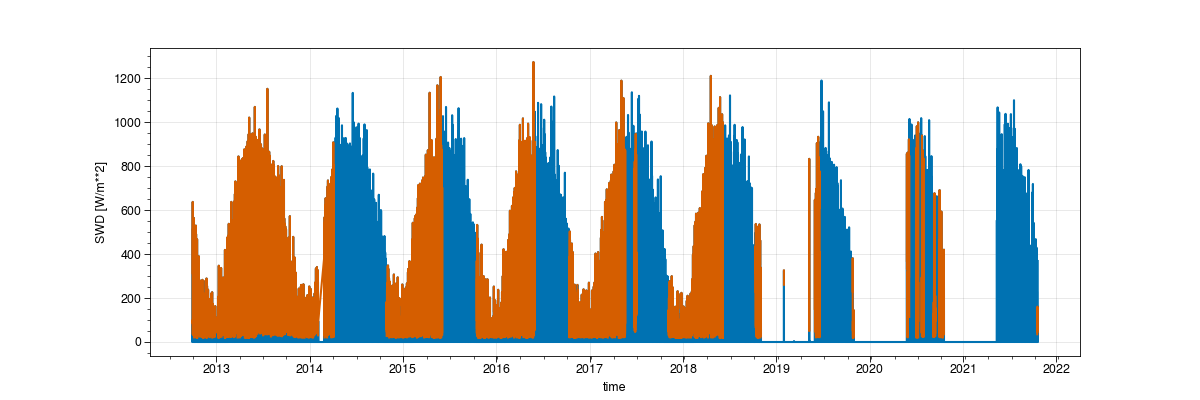

In [120]:
%matplotlib widget
glob.plot(figsize=(12, 4))
glob.where( (glob >= 20) & (ref >= 2) ).where( glob > ref ).where(ds_tundra.snd_auto).plot()


In [122]:
GLOB_filt_day = glob.where( (glob >= 20) & (ref >= 2) ).where( glob > ref ).where(ds_tundra.snd_auto).resample(time='D').sum(min_count=5)
REFL_filt_day = ref.where( (glob >= 20) & (ref >= 2) ).where( glob > ref ).where(ds_tundra.snd_auto).resample(time='D').sum(min_count=5)
albs_temp = REFL_filt_day / GLOB_filt_day

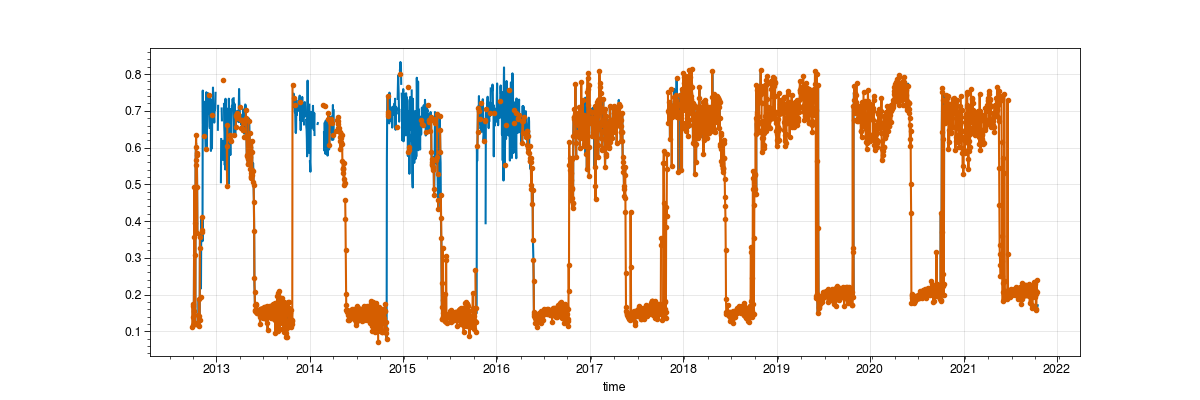

In [138]:
%matplotlib widget
albs_temp.where(albs_temp < 0.9).plot(figsize=(12, 4))
(up2.resample(time='D').sum(min_count=5) / down2.resample(time='D').sum(min_count=5)).plot(marker='.')

In [129]:
GLOB_filt_day_2 = glob_2.where( (glob_2 >= 20) & (ref_2 >= 2) ).where( glob_2 > ref_2 ).resample(time='D').sum(min_count=5)
REFL_filt_day_2 = ref_2.where( (glob_2 >= 20) & (ref_2 >= 2) ).where( glob_2 > ref_2 ).resample(time='D').sum(min_count=5)
albs_temp_2 = REFL_filt_day_2 / GLOB_filt_day_2

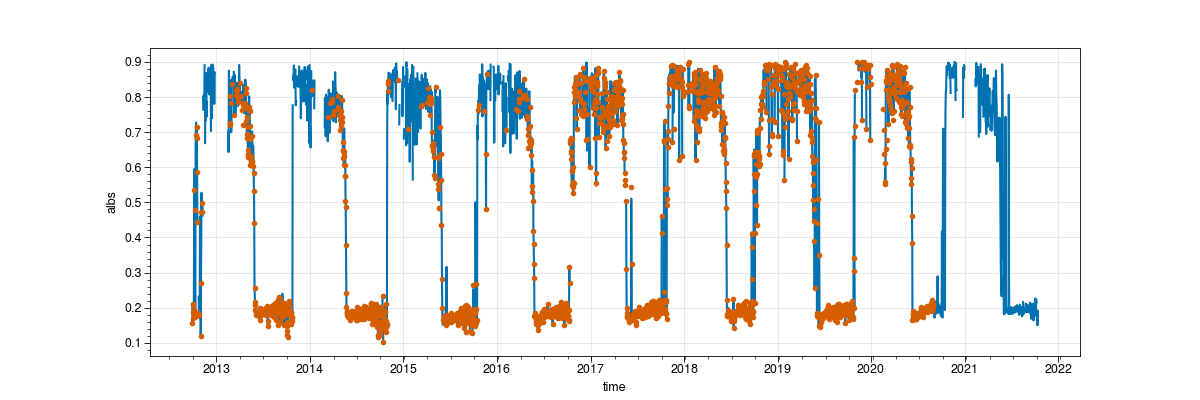

In [130]:
%matplotlib widget
albs_temp_2.where(albs_temp_2 < 0.9).plot(figsize=(12, 4))
obs_manon.albs.plot(marker='.')

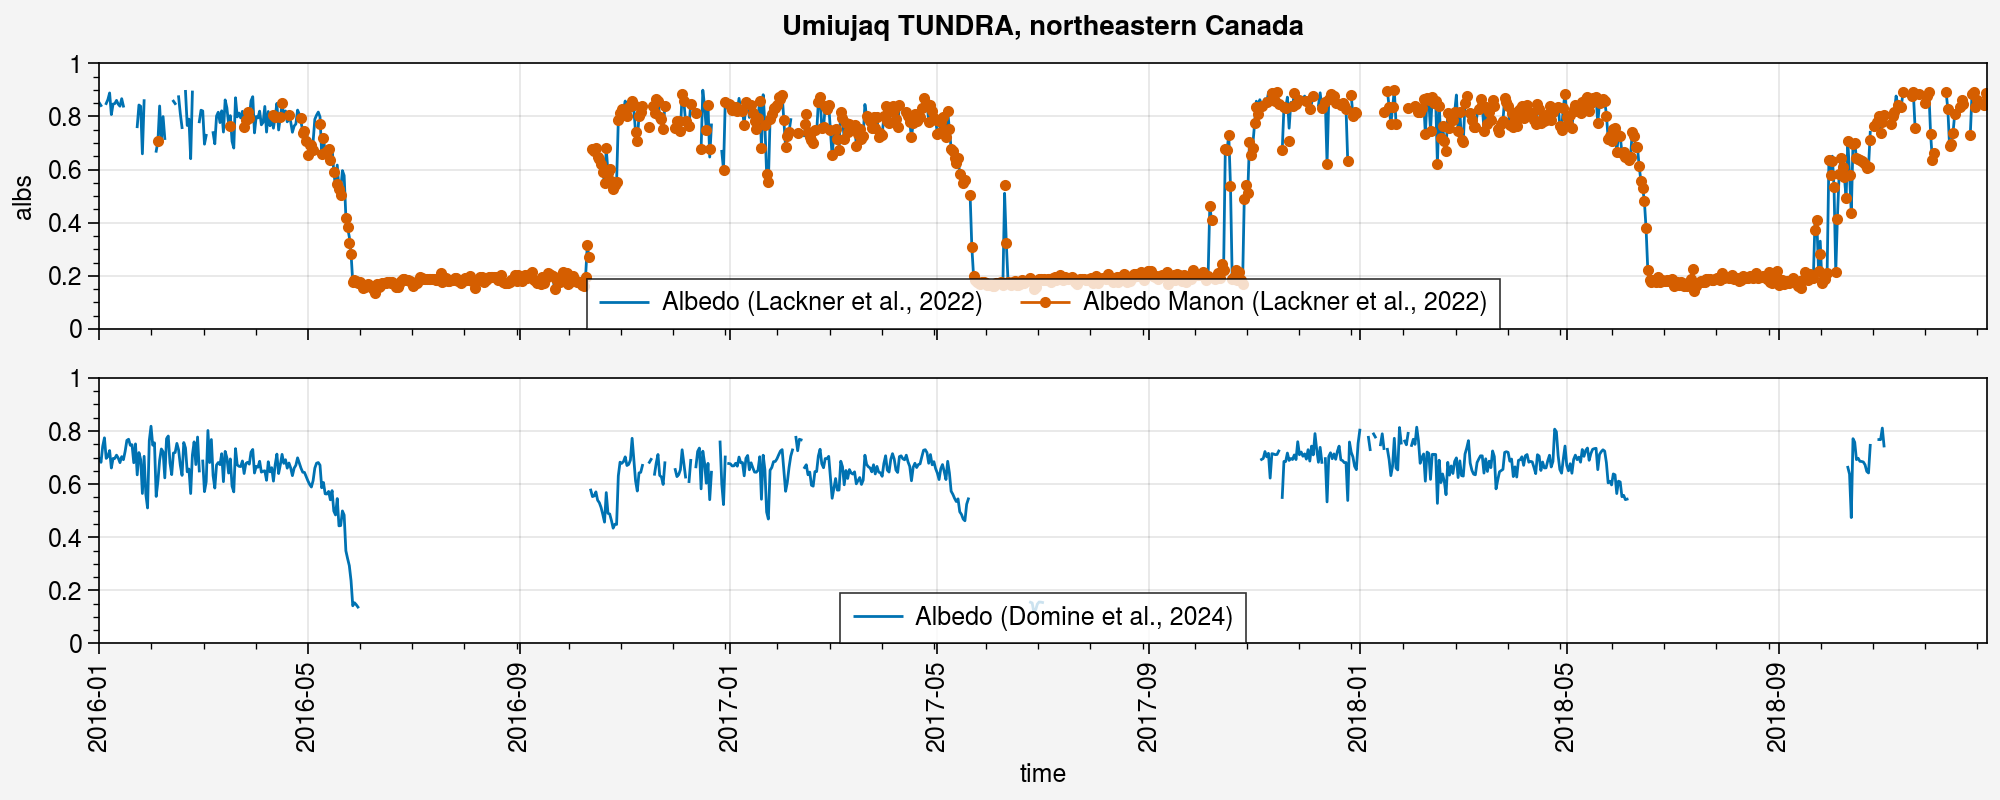

In [158]:
%matplotlib inline
fig, axs = pplt.subplots(nrows=2, figsize=(10,4), sharey=0)

period=slice('2016', '2018')

ax = axs[0]
ax.plot(albs_temp_2.sel(time=period).where(albs_temp_2 < 0.9), label='Albedo (Lackner et al., 2022)', lw=1)
ax.plot(obs_manon.sel(time=period).albs, marker='.', label='Albedo Manon (Lackner et al., 2022)', lw=1)

ax = axs[1]
ax.plot(albs_temp.sel(time=period).where(albs_temp < 0.9), label='Albedo (Domine et al., 2024)', lw=1)
# ax.plot(obs_manon.sel(time=period).albs, marker='.', label='SD (Lackner et al., 2022)', lw=1)

fig.suptitle('Umiujaq TUNDRA, northeastern Canada')

axs[0].legend(ncols=2, loc='lc')
axs[1].legend(ncols=2, loc='lc')

for ax in axs:
    ax.format(ylim=(0,1))

# fig.save('Umiujac_TUNDRA_alb_comparison.pdf')

In [ ]:
GLOBval=20
REFLval=2
mask = np.logical_and(ds.GLOB>=GLOBval, ds.REFL>=REFLval)
mask = np.logical_and(mask, ds.GLOB>ds.REFL)
mask = np.logical_and(mask, ds.snow.values)
GLOB_resamp = ds.GLOB[mask].resample(time='1D')
REFL_resamp = ds.REFL[mask].resample(time='1D')
mask_resamp = GLOB_resamp.count()>=5
GLOB_filt_day = GLOB_resamp.sum()[mask_resamp]
REFL_filt_day = REFL_resamp.sum()[mask_resamp]
albs_temp = REFL_filt_day / GLOB_filt_day
ds['albs'] = albs_temp[albs_temp<0.9]
ds['albs_raw'] = ds.REFL / ds.GLOB

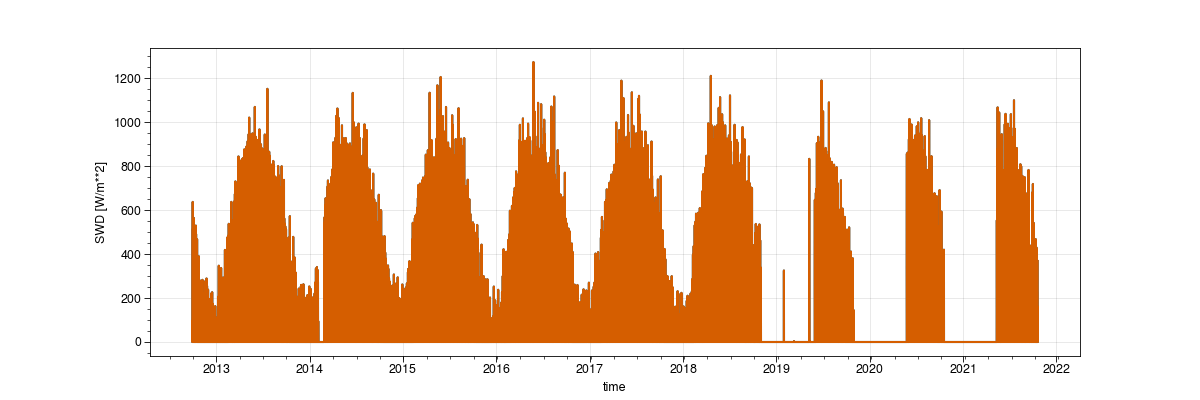

In [106]:
%matplotlib widget
glob.plot(figsize=(12, 4))
glob.drop_duplicates(dim='time', keep='first').plot()

In [44]:
df_rad_tundra

SWD [W/m**2]  QF SWD  SWU [W/m**2]  QF SWU  LWD [W/m**2]  \
Date/Time                                                                       
2012-09-28 21:00:00        36.868       0         3.310       0       325.559   
2012-09-28 22:00:00         0.000       0         0.000       0       310.652   
2012-09-28 23:00:00         0.000       0         0.000       0       314.352   
2012-09-29 00:00:00         0.000       0         0.000       0       310.439   
2012-09-29 01:00:00         0.000       0         0.000       0       331.280   
...                           ...     ...           ...     ...           ...   
2021-10-19 10:00:00         0.000       0         0.000       0           NaN   
2021-10-19 11:00:00         5.840       0         0.000       0           NaN   
2021-10-19 12:00:00        51.647       0        10.697       0           NaN   
2021-10-19 13:00:00       128.998       0        27.978       0           NaN   
2021-10-19 14:00:00       368.730       0        91.065       0           NaN   

                     QF LWD  LWU [W/m**2]  QF LWU  
Date/Time                                          
2012-09-28 21:00:00     0.0       355.414     0.0  
2012-09-28 22:00:00     0.0       346.563     0.0  
2012-09-28 23:00:00     0.0       338.110     0.0  
2012-09-29 00:00:00     0.0       342.436     0.0  
2012-09-29 01:00:00     0.0       344.852     0.0  
...                     ...           ...     ...  
2021-10-19 10:00:00     NaN           NaN     NaN  
2021-10-19 11:00:00     NaN           NaN     NaN  
2021-10-19 12:00:00     NaN           NaN     NaN  
2021-10-19 13:00:00     NaN           NaN     NaN  
2021-10-19 14:00:00     NaN           NaN     NaN  

[79386 rows x 8 columns]

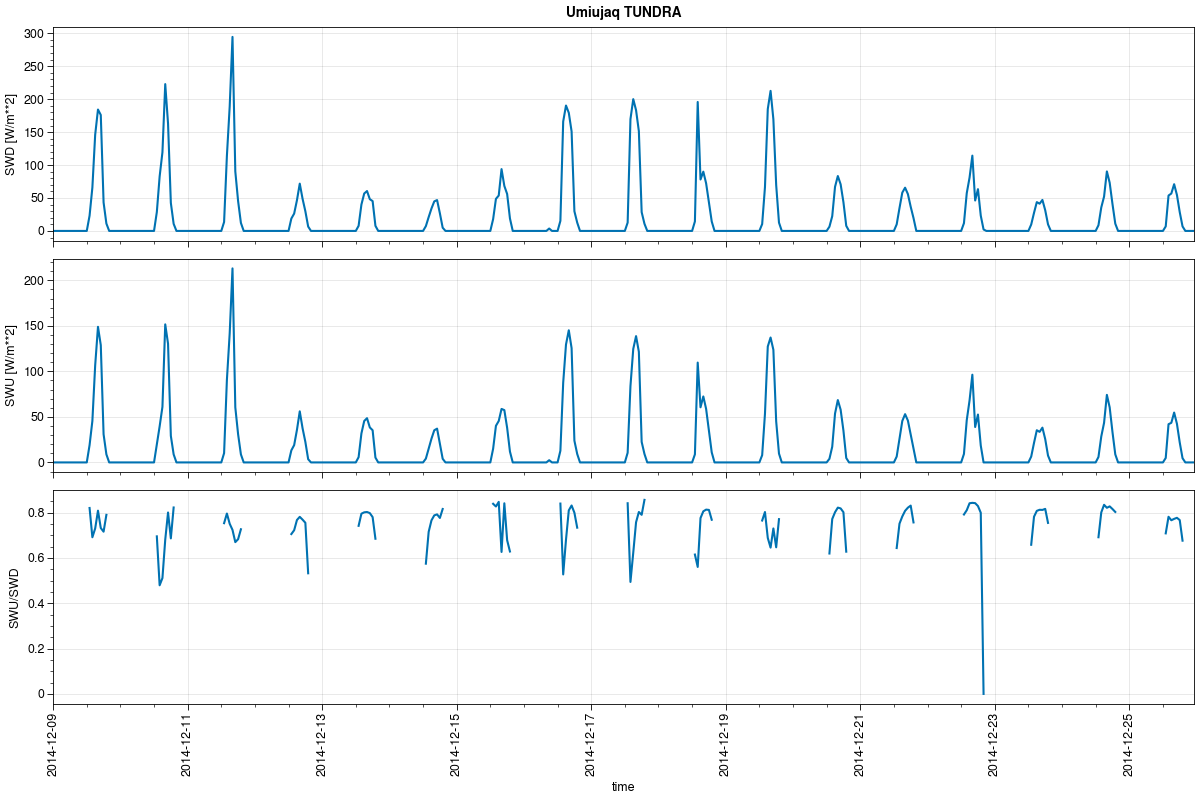

In [75]:
%matplotlib widget
ds_rad_tundra = df_rad_tundra.to_xarray()
ds_rad_tundra = ds_rad_tundra.rename({'Date/Time': 'time'})
fig, axs = pplt.subplots(nrows=3, figsize=(12, 4*2), sharey=0)
period = slice(None, None)
period = slice('2014-12-09', '2014-12-25')
axs[0].plot(ds_rad_tundra['SWD [W/m**2]'].sel(time=period))
axs[0].format(ylabel='SWD [W/m**2]')
axs[1].plot(ds_rad_tundra['SWU [W/m**2]'].sel(time=period))
axs[1].format(ylabel='SWU [W/m**2]')
axs[2].plot(ds_rad_tundra['SWU [W/m**2]'].sel(time=period) / ds_rad_tundra['SWD [W/m**2]'].sel(time=period))
axs[2].format(ylabel='SWU/SWD')

fig.format(suptitle='Umiujaq TUNDRA')

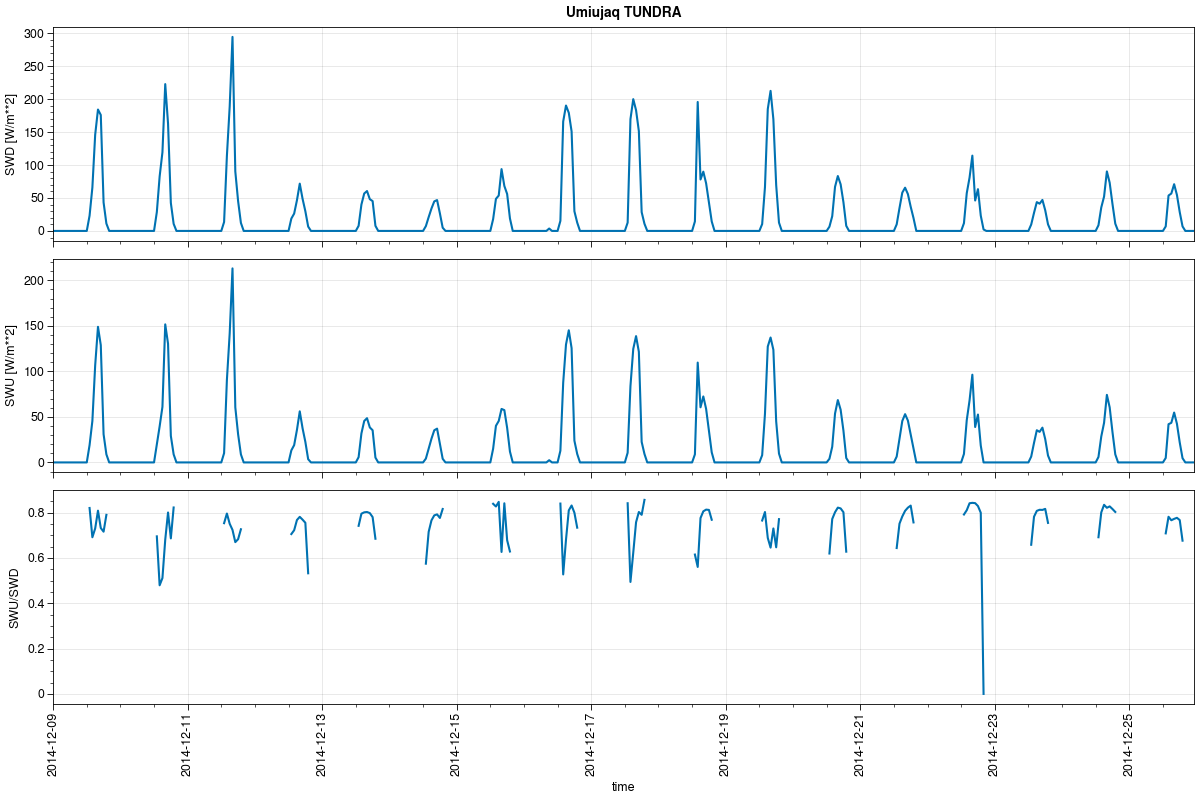

In [74]:
%matplotlib widget
ds_rad_tundra = df_rad_tundra.to_xarray()
ds_rad_tundra = ds_rad_tundra.rename({'Date/Time': 'time'})
fig, axs = pplt.subplots(nrows=3, figsize=(12, 4*2), sharey=0)
period = slice(None, None)
period = slice('2014-12-09', '2014-12-25')
axs[0].plot(ds_rad_tundra['SWD [W/m**2]'].sel(time=period))
axs[0].format(ylabel='SWD [W/m**2]')
axs[1].plot(ds_rad_tundra['SWU [W/m**2]'].sel(time=period))
axs[1].format(ylabel='SWU [W/m**2]')
axs[2].plot(ds_rad_tundra['SWU [W/m**2]'].sel(time=period) / ds_rad_tundra['SWD [W/m**2]'].sel(time=period))
axs[2].format(ylabel='SWU/SWD')

fig.format(suptitle='Umiujaq TUNDRA')

In [132]:
site = 'umt'
site_longname = 'Umiujaq TUNDRA, northeastern Canada'

year_start = '2012'
year_end = '2021'

lat = 56.559167
lon = -76.482056

path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets'

ds = xr.open_dataset(path+'/met_insitu_'+site+'_'+year_start+'_'+year_end+'.nc')
ds

<xarray.Dataset> Size: 6MB
Dimensions:    (time: 79403)
Coordinates:
  * time       (time) datetime64[ns] 635kB 2012-09-28 ... 2021-10-19T10:00:00
Data variables:
    Rainf      (time) float64 635kB ...
    Snowf      (time) float64 635kB ...
    TotPrecip  (time) float64 635kB ...
    SWdown     (time) float64 635kB ...
    LWdown     (time) float64 635kB ...
    Tair       (time) float64 635kB ...
    Wind       (time) float64 635kB ...
    Psurf      (time) float64 635kB ...
    Qair       (time) float64 635kB ...

In [62]:
ds_rad_tundra['SWD [W/m**2]'].where(mask)

<xarray.Dataset>
Dimensions:       (time: 79382)
Coordinates:
  * time          (time) datetime64[ns] 2012-09-28T21:00:00 ... 2021-10-19T10...
Data variables:
    SWD [W/m**2]  (time) float64 36.87 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    QF SWD        (time) float64 36.87 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SWU [W/m**2]  (time) float64 36.87 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    QF SWU        (time) float64 36.87 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    LWD [W/m**2]  (time) float64 36.87 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    QF LWD        (time) float64 36.87 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    LWU [W/m**2]  (time) float64 36.87 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    QF LWU        (time) float64 36.87 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

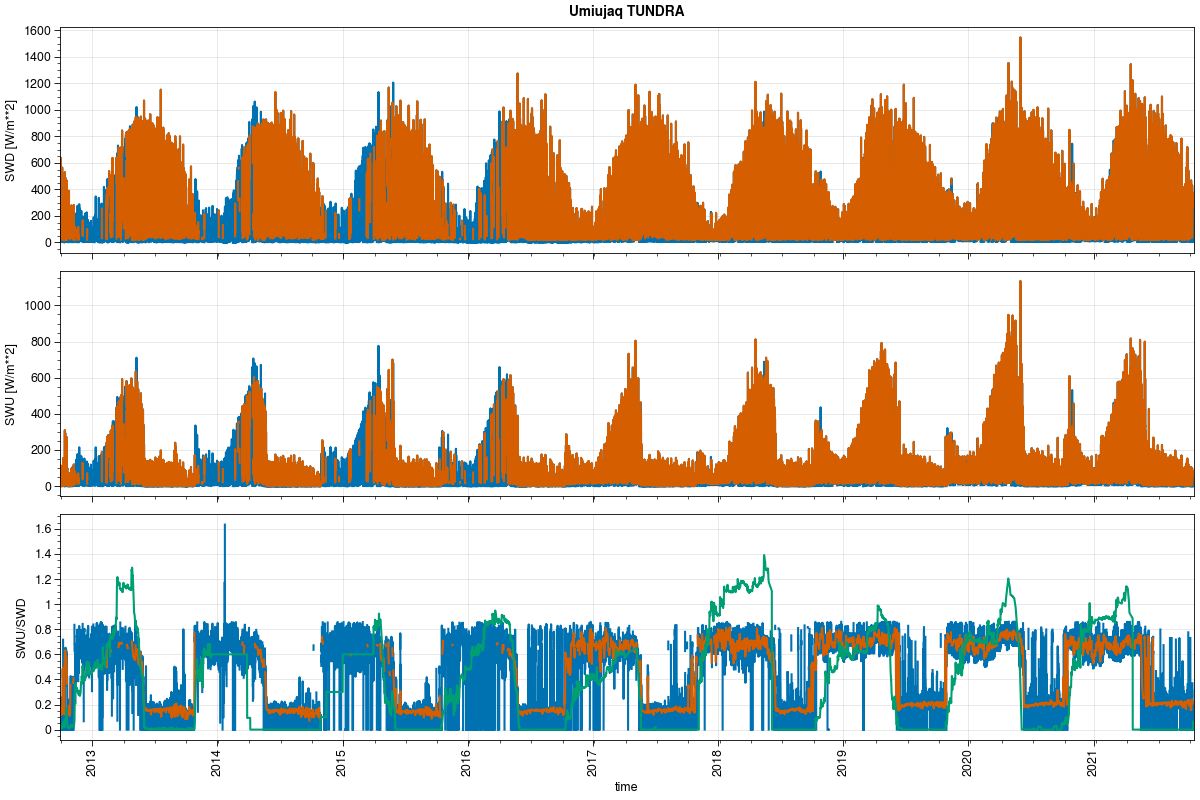

In [137]:
%matplotlib widget
ds_rad_tundra = df_rad_tundra.to_xarray()
ds_rad_tundra = ds_rad_tundra.rename({'Date/Time': 'time'})
fig, axs = pplt.subplots(nrows=3, figsize=(12, 4*2), sharey=0)
period = slice(None, None)
# period = slice('2014-02-09', '2014-02-25')

down = ds_rad_tundra['SWD [W/m**2]'].where(ds_rad_tundra['SWD [W/m**2]'] > 0).sel(time=period)
up = ds_rad_tundra['SWU [W/m**2]'].where(ds_rad_tundra['SWD [W/m**2]'] > 0).sel(time=period)

mask = ds_rad_tundra['SWD [W/m**2]'].where(ds_rad_tundra['SWD [W/m**2]'] > 20).where(ds_rad_tundra['SWU [W/m**2]'] > 2).where(ds.Snowf == 0)
down2 = ds_rad_tundra['SWD [W/m**2]'].where(mask*0 == 0).sel(time=period)
up2 = ds_rad_tundra['SWU [W/m**2]'].where(mask*0 == 0).sel(time=period)

axs[0].plot(down)
axs[0].plot(down2)
# axs[0].plot(down.resample(time='D').mean())
# axs[0].plot(down2.resample(time='D').mean())
axs[0].format(ylabel='SWD [W/m**2]')
axs[1].plot(up)
axs[1].plot(up2)
# axs[1].plot(up.resample(time='D').mean())
# axs[1].plot(up2.resample(time='D').mean())
axs[1].format(ylabel='SWU [W/m**2]')
axs[2].plot(up / down)
# axs[2].plot(up.resample(time='D').mean() / down.resample(time='D').mean())
axs[2].plot(up2.resample(time='D').sum(min_count=5) / down2.resample(time='D').sum(min_count=5))
axs[2].plot(ds_tundra.snd_auto)
axs[2].format(ylabel='SWU/SWD')

fig.format(suptitle='Umiujaq TUNDRA')

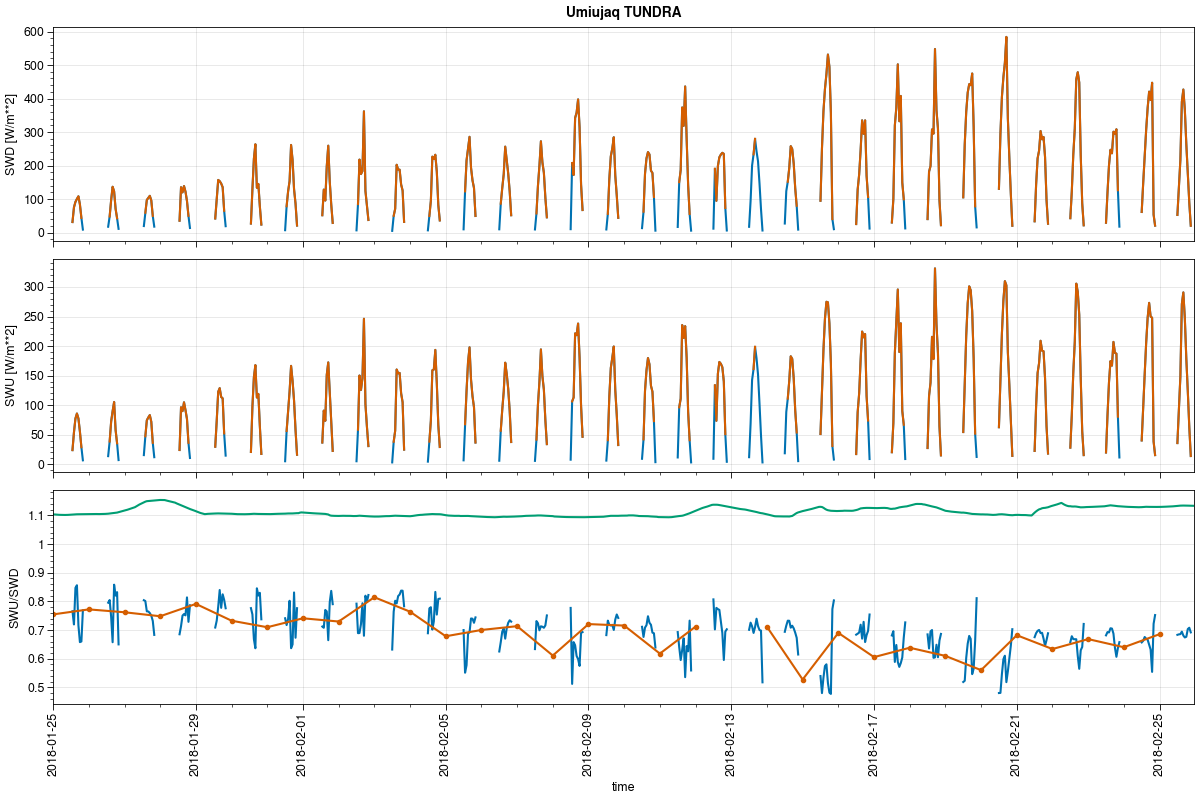

In [134]:
%matplotlib widget
ds_rad_tundra = df_rad_tundra.to_xarray()
ds_rad_tundra = ds_rad_tundra.rename({'Date/Time': 'time'})
fig, axs = pplt.subplots(nrows=3, figsize=(12, 4*2), sharey=0)
period = slice(None, None)
period = slice('2018-01-25', '2018-02-25')

down = ds_rad_tundra['SWD [W/m**2]'].where(ds_rad_tundra['SWD [W/m**2]'] > 0).sel(time=period)
up = ds_rad_tundra['SWU [W/m**2]'].where(ds_rad_tundra['SWD [W/m**2]'] > 0).sel(time=period)

mask = ds_rad_tundra['SWD [W/m**2]'].where(ds_rad_tundra['SWD [W/m**2]'] > 20).where(ds_rad_tundra['SWU [W/m**2]'] > 2).where(ds.Snowf == 0)
down2 = ds_rad_tundra['SWD [W/m**2]'].where(mask*0 == 0).sel(time=period)
up2 = ds_rad_tundra['SWU [W/m**2]'].where(mask*0 == 0).sel(time=period)

axs[0].plot(down)
axs[0].plot(down2)
# axs[0].plot(down.resample(time='D').mean())
# axs[0].plot(down2.resample(time='D').mean())
axs[0].format(ylabel='SWD [W/m**2]')
axs[1].plot(up)
axs[1].plot(up2)
# axs[1].plot(up.resample(time='D').mean())
# axs[1].plot(up2.resample(time='D').mean())
axs[1].format(ylabel='SWU [W/m**2]')
axs[2].plot(up / down)
# axs[2].plot(up2 / down2)
# axs[2].plot(up.resample(time='D').mean() / down.resample(time='D').mean(), color='C0', marker='.')
axs[2].plot(up2.resample(time='D').sum(min_count=5) / down2.resample(time='D').sum(min_count=5), marker='.')
axs[2].plot(ds_tundra.snd_auto.sel(time=period))
axs[2].format(ylabel='SWU/SWD')

fig.format(suptitle='Umiujaq TUNDRA')

In [75]:
ds_tundra.snd_auto

<xarray.DataArray 'snd_auto' (time: 79382)>
array([0.    , 0.    , 0.    , ..., 0.0579, 0.0575, 0.0568])
Coordinates:
  * time     (time) datetime64[ns] 2012-09-28T21:00:00 ... 2021-10-19T10:00:00
Attributes:
    name:     Snow h
    unit:     m

In [50]:
df_rad_tundra.columns.values[:-1]

array(['SWD [W/m**2]', 'QF SWD', 'SWU [W/m**2]', 'QF SWU', 'LWD [W/m**2]',
       'QF LWD', 'LWU [W/m**2]'], dtype=object)

(380568.0, 380616.0)

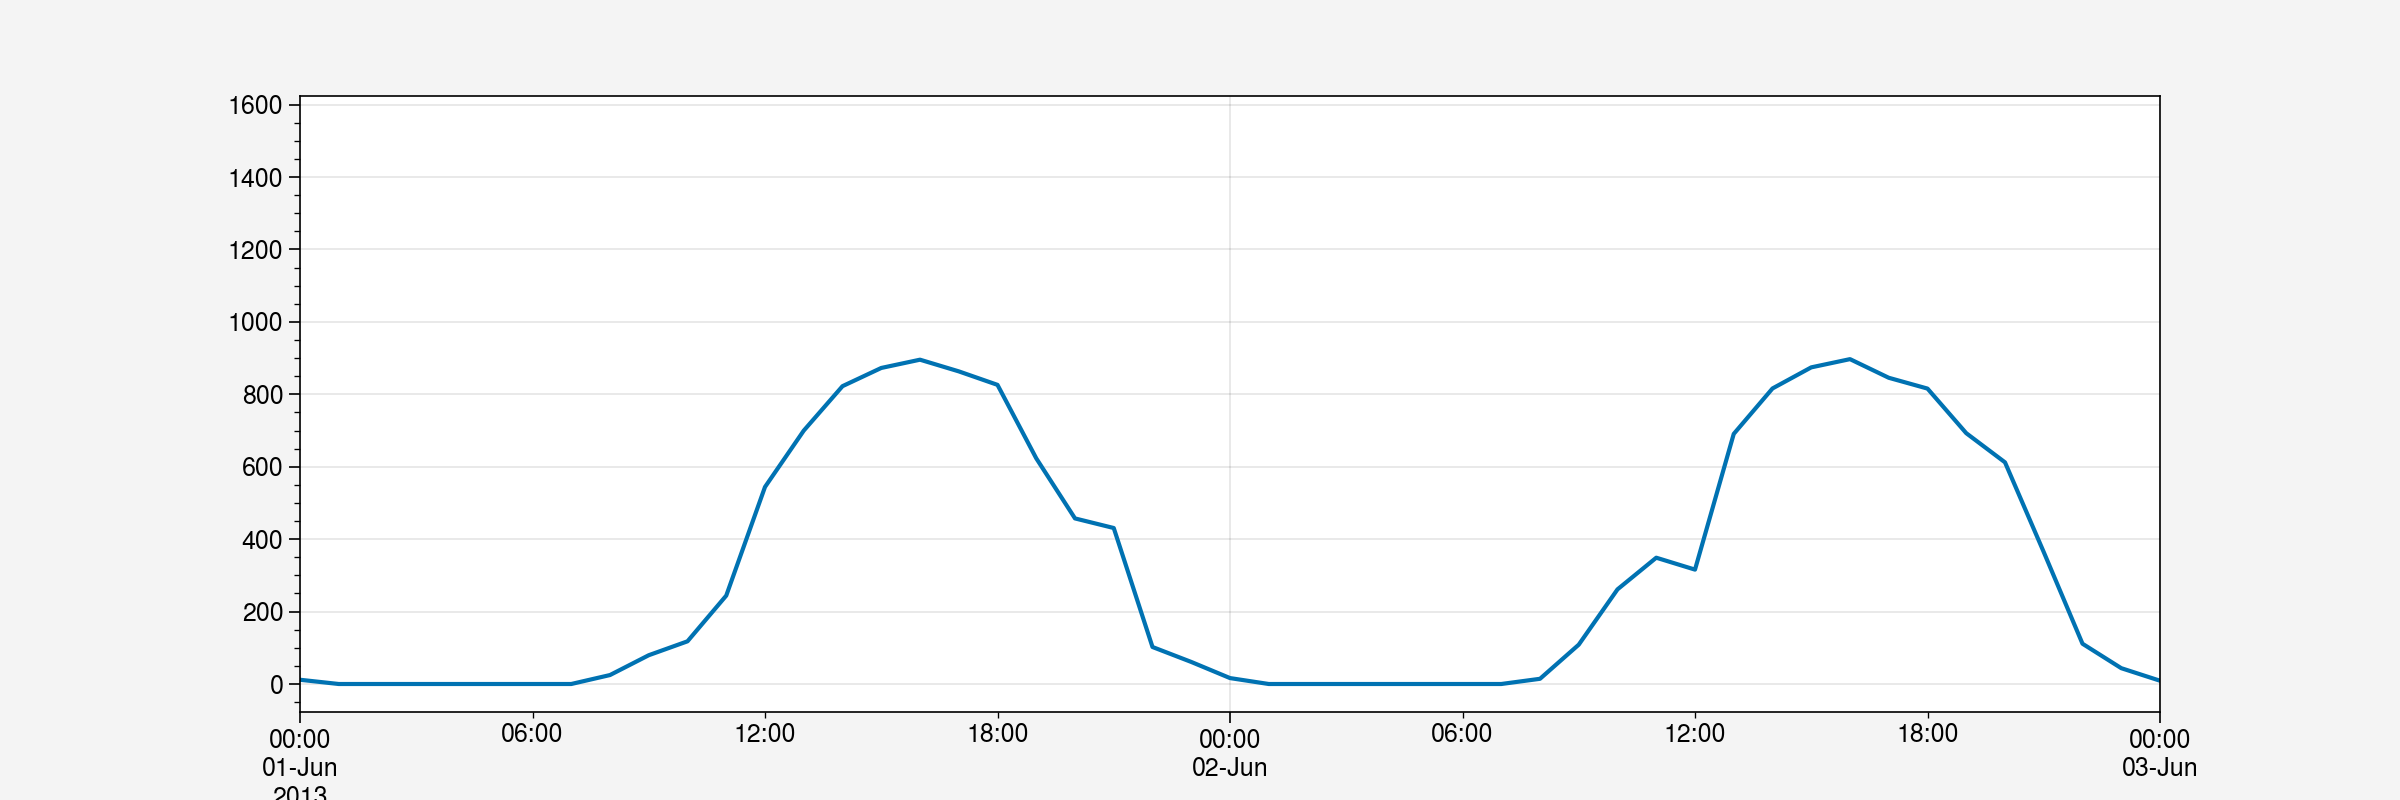

In [51]:
%matplotlib inline
df_rad_tundra['SWD [W/m**2]'].plot(figsize=(12, 4))
plt.xlim('2013-06-01','2013-06-03')

In [52]:
df_rad_tundra['albs'] = df_rad_tundra['SWU [W/m**2]'] / df_rad_tundra['SWD [W/m**2]']
df_alb_tundra = df_rad_tundra.copy()
df_alb_tundra = df_alb_tundra.drop(columns=df_rad_tundra.columns.values[:-1])
df_alb_tundra.index.names = ['time']
df_alb_tundra

albs
time                         
2012-09-28 21:00:00  0.089780
2012-09-28 22:00:00       NaN
2012-09-28 23:00:00       NaN
2012-09-29 00:00:00       NaN
2012-09-29 01:00:00       NaN
...                       ...
2021-10-19 10:00:00       NaN
2021-10-19 11:00:00  0.000000
2021-10-19 12:00:00  0.207118
2021-10-19 13:00:00  0.216887
2021-10-19 14:00:00  0.246969

[79386 rows x 1 columns]

In [53]:
ds_alb_tundra = df_alb_tundra.to_xarray()
ds_alb_tundra['albs'].attrs['long_name'] = 'surface albedo'
ds_alb_tundra['albs'].attrs['units'] = '-'
ds_alb_tundra = ds_alb_tundra.where(ds_alb_tundra < 1)
ds_alb_tundra

<xarray.Dataset>
Dimensions:  (time: 79386)
Coordinates:
  * time     (time) datetime64[ns] 2012-09-28T21:00:00 ... 2021-10-19T14:00:00
Data variables:
    albs     (time) float64 0.08978 nan nan nan nan ... 0.0 0.2071 0.2169 0.247

In [54]:
ds_tundra = ds_tundra.merge(ds_alb_tundra)
ds_tundra

<xarray.Dataset>
Dimensions:   (time: 79386, veg: 2, sdepth: 4)
Coordinates:
  * time      (time) datetime64[ns] 2012-09-28T21:00:00 ... 2021-10-19T14:00:00
  * veg       (veg) <U8 'lichen' 'lowshrub'
  * sdepth    (sdepth) float64 0.15 0.25 0.35 0.45
Data variables:
    snd_auto  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0568 nan nan nan nan
    mrsll     (veg, sdepth, time) float64 nan nan nan nan ... nan nan nan nan
    tsl       (veg, sdepth, time) float64 nan nan nan nan ... nan nan nan nan
    albs      (time) float64 0.08978 nan nan nan nan ... 0.0 0.2071 0.2169 0.247
Attributes:
    event:          Umiujaq_2012-2021_Tundra
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

#### Forest

In [55]:
ds_forest

<xarray.Dataset>
Dimensions:   (time: 53338, sdepth: 5)
Coordinates:
  * time      (time) datetime64[ns] 2015-09-19T04:00:00 ... 2021-10-19T13:00:00
  * sdepth    (sdepth) float64 0.05 0.1 0.2 0.3 0.5
Data variables:
    snd_auto  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    swc       (sdepth, time) float64 0.2605 0.2598 0.2595 0.2588 ... nan nan nan
    tsl       (sdepth, time) float64 7.2 7.1 7.0 6.9 6.9 ... nan nan nan nan nan
Attributes:
    event:          Umiujaq_2015-2021_Forest
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

In [56]:
df_rad_forest = pd.read_csv(path_obs+'/Umiujaq_rad_forest.tab', skiprows=31, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_rad_forest

SWD [W/m**2]  QF SWD  SWU [W/m**2]  QF SWU  LWD [W/m**2]  \
Date/Time                                                                       
2015-11-26 08:00:00         0.000       0         0.000       0       295.638   
2015-11-26 09:00:00         0.000       0         0.000       0       289.122   
2015-11-26 10:00:00         0.000       0         0.000       0       281.277   
2015-11-26 11:00:00         0.000       0         0.000       0       286.900   
2015-11-26 12:00:00         8.706       0         6.906       1       264.778   
...                           ...     ...           ...     ...           ...   
2021-10-14 23:00:00         0.000       0         0.000       0       256.578   
2021-10-15 00:00:00         0.000       0         0.000       0       262.389   
2021-10-15 01:00:00         0.000       0         0.000       0       265.666   
2021-10-15 02:00:00         0.000       0         0.000       0       272.633   
2021-10-15 03:00:00         0.000       0         0.000       0       262.239   

                     QF LWD  LWU [W/m**2]  QF LWU  
Date/Time                                          
2015-11-26 08:00:00       0       285.366       0  
2015-11-26 09:00:00       0       285.610       0  
2015-11-26 10:00:00       0       285.919       0  
2015-11-26 11:00:00       0       288.922       0  
2015-11-26 12:00:00       0       287.333       0  
...                     ...           ...     ...  
2021-10-14 23:00:00       0       335.015       0  
2021-10-15 00:00:00       0       333.473       0  
2021-10-15 01:00:00       0       332.072       0  
2021-10-15 02:00:00       0       331.530       0  
2021-10-15 03:00:00       0       329.101       0  

[51596 rows x 8 columns]

<AxesSubplot:xlabel='Date/Time'>

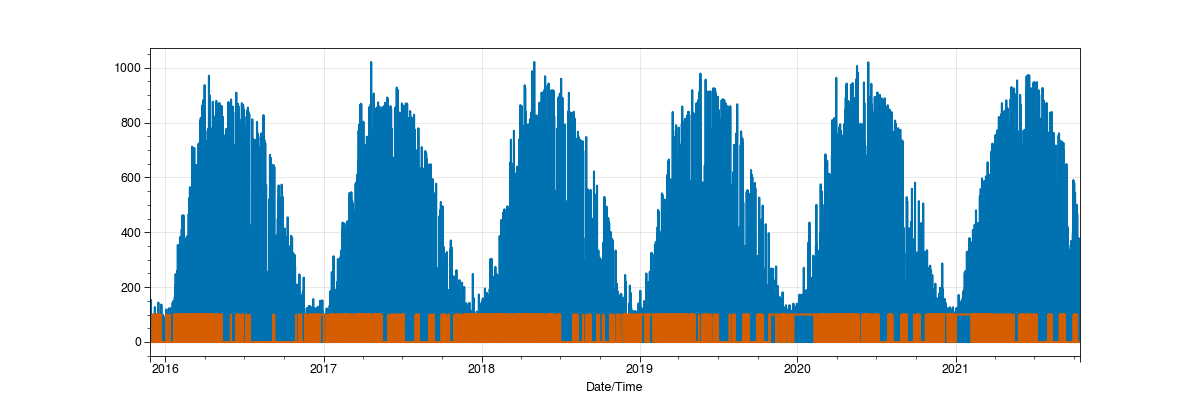

In [57]:
%matplotlib widget
df_rad_forest['SWD [W/m**2]'].plot(figsize=(12, 4))
(df_rad_forest['QF SWD']*100).plot()

<AxesSubplot:xlabel='Date/Time'>

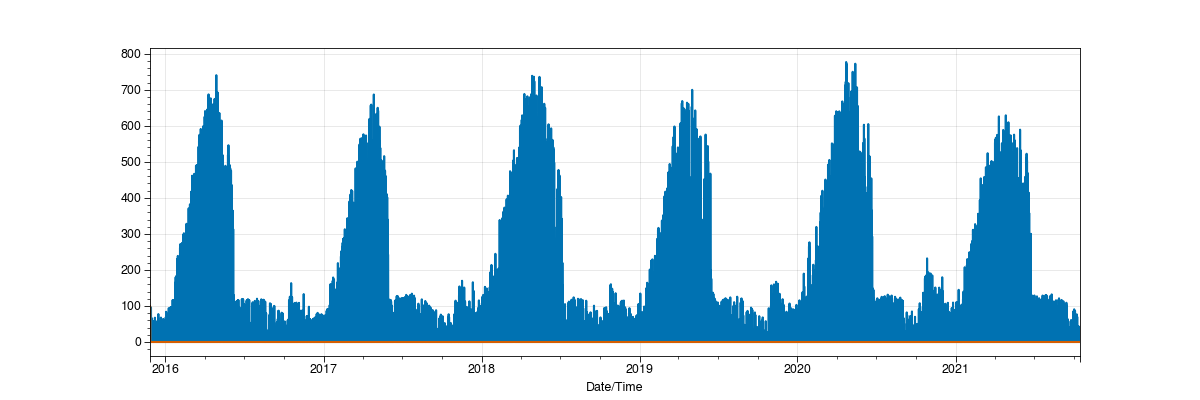

In [58]:
%matplotlib widget
df_rad_forest['SWU [W/m**2]'].plot(figsize=(12, 4))
(df_rad_forest['QF SWU']*100).plot()

<AxesSubplot:xlabel='Date/Time'>

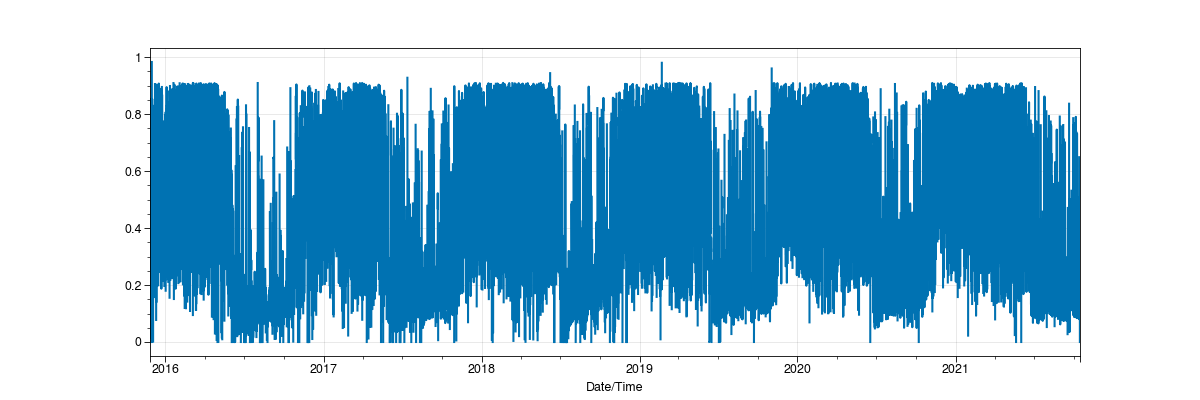

In [59]:
%matplotlib widget
(df_rad_forest['SWU [W/m**2]'] / df_rad_forest['SWD [W/m**2]']).where(
    (df_rad_forest['SWU [W/m**2]'] / df_rad_forest['SWD [W/m**2]']) < 1).plot(figsize=(12, 4))

In [60]:
df_rad_forest.columns.values[:-1]

array(['SWD [W/m**2]', 'QF SWD', 'SWU [W/m**2]', 'QF SWU', 'LWD [W/m**2]',
       'QF LWD', 'LWU [W/m**2]'], dtype=object)

(406872.0, 406920.0)

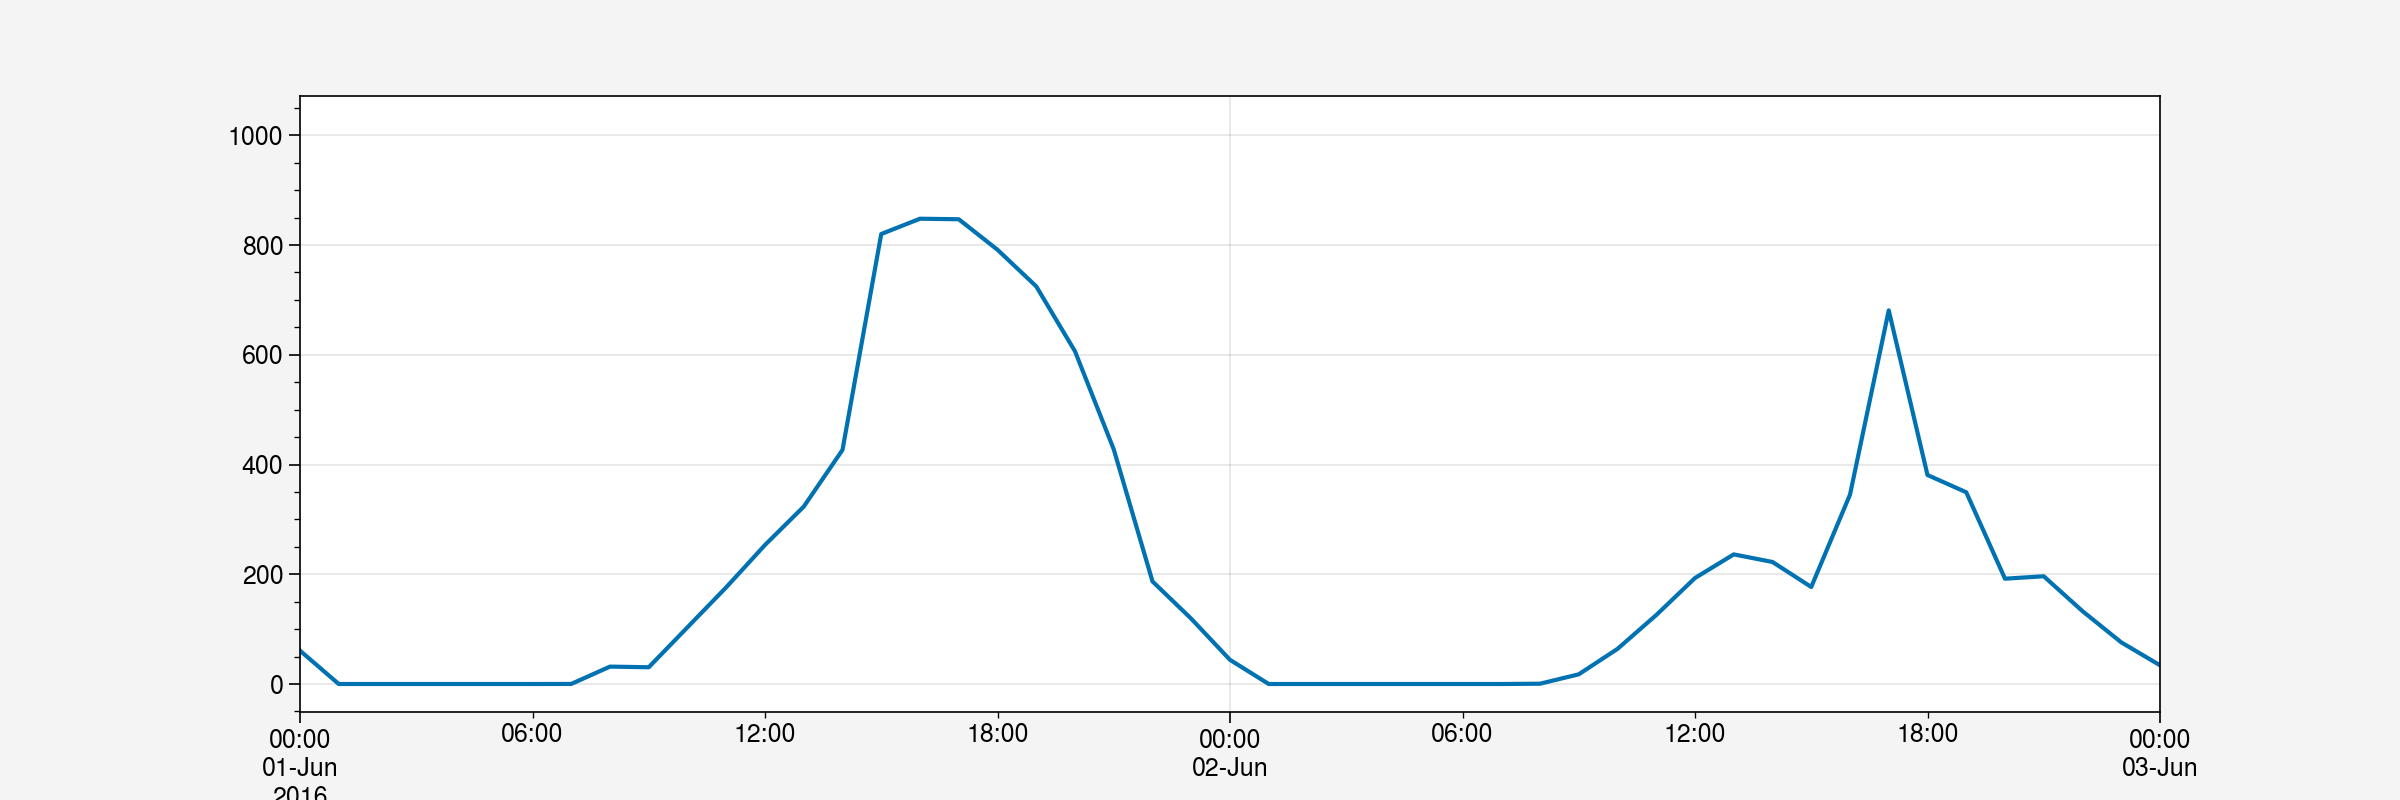

In [61]:
%matplotlib inline
df_rad_forest['SWD [W/m**2]'].plot(figsize=(12, 4))
plt.xlim('2016-06-01','2016-06-03')

In [62]:
df_rad_forest['albs'] = df_rad_forest['SWU [W/m**2]'] / df_rad_forest['SWD [W/m**2]']
df_alb_forest = df_rad_forest.copy()
df_alb_forest = df_alb_forest.drop(columns=df_rad_forest.columns.values[:-1])
df_alb_forest.index.names = ['time']
df_alb_forest

albs
time                         
2015-11-26 08:00:00       NaN
2015-11-26 09:00:00       NaN
2015-11-26 10:00:00       NaN
2015-11-26 11:00:00       NaN
2015-11-26 12:00:00  0.793246
...                       ...
2021-10-14 23:00:00       NaN
2021-10-15 00:00:00       NaN
2021-10-15 01:00:00       NaN
2021-10-15 02:00:00       NaN
2021-10-15 03:00:00       NaN

[51596 rows x 1 columns]

In [63]:
ds_alb_forest = df_alb_forest.to_xarray()
ds_alb_forest['albs'].attrs['long_name'] = 'surface albedo'
ds_alb_forest['albs'].attrs['units'] = '-'
ds_alb_forest = ds_alb_forest.where(ds_alb_forest < 1)
ds_alb_forest

<xarray.Dataset>
Dimensions:  (time: 51596)
Coordinates:
  * time     (time) datetime64[ns] 2015-11-26T08:00:00 ... 2021-10-15T03:00:00
Data variables:
    albs     (time) float64 nan nan nan nan 0.7932 ... nan nan nan nan nan

In [64]:
ds_forest = ds_forest.merge(ds_alb_forest)
ds_forest

<xarray.Dataset>
Dimensions:   (time: 53338, sdepth: 5)
Coordinates:
  * time      (time) datetime64[ns] 2015-09-19T04:00:00 ... 2021-10-19T13:00:00
  * sdepth    (sdepth) float64 0.05 0.1 0.2 0.3 0.5
Data variables:
    snd_auto  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    swc       (sdepth, time) float64 0.2605 0.2598 0.2595 0.2588 ... nan nan nan
    tsl       (sdepth, time) float64 7.2 7.1 7.0 6.9 6.9 ... nan nan nan nan nan
    albs      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    event:          Umiujaq_2015-2021_Forest
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

## Surface temperature

Could get the surface temperature from the LWU. Would need to be looked carefully as I'm worried that with the shrubbs the 
temperature might not be enbterily representative of the snow temperature...

## Go back to local time and save

In [65]:
# Convert the Florent dataset back to local time
# ds_forcing['time'] = pd.to_datetime(ds_forcing.time.values).tz_localize('UTC').tz_convert('America/Toronto').tz_localize(None)
ds_tundra_local = ds_tundra.copy()
ds_forest_local = ds_forest.copy()

ds_tundra_local['time'] = pd.to_datetime(ds_tundra.time.values) - pd.Timedelta(hours=4) # to avoid the day light savings adjustment
ds_forest_local['time'] = pd.to_datetime(ds_forest.time.values) - pd.Timedelta(hours=4) # to avoid the day light savings adjustment

(16937.0, 16938.0)

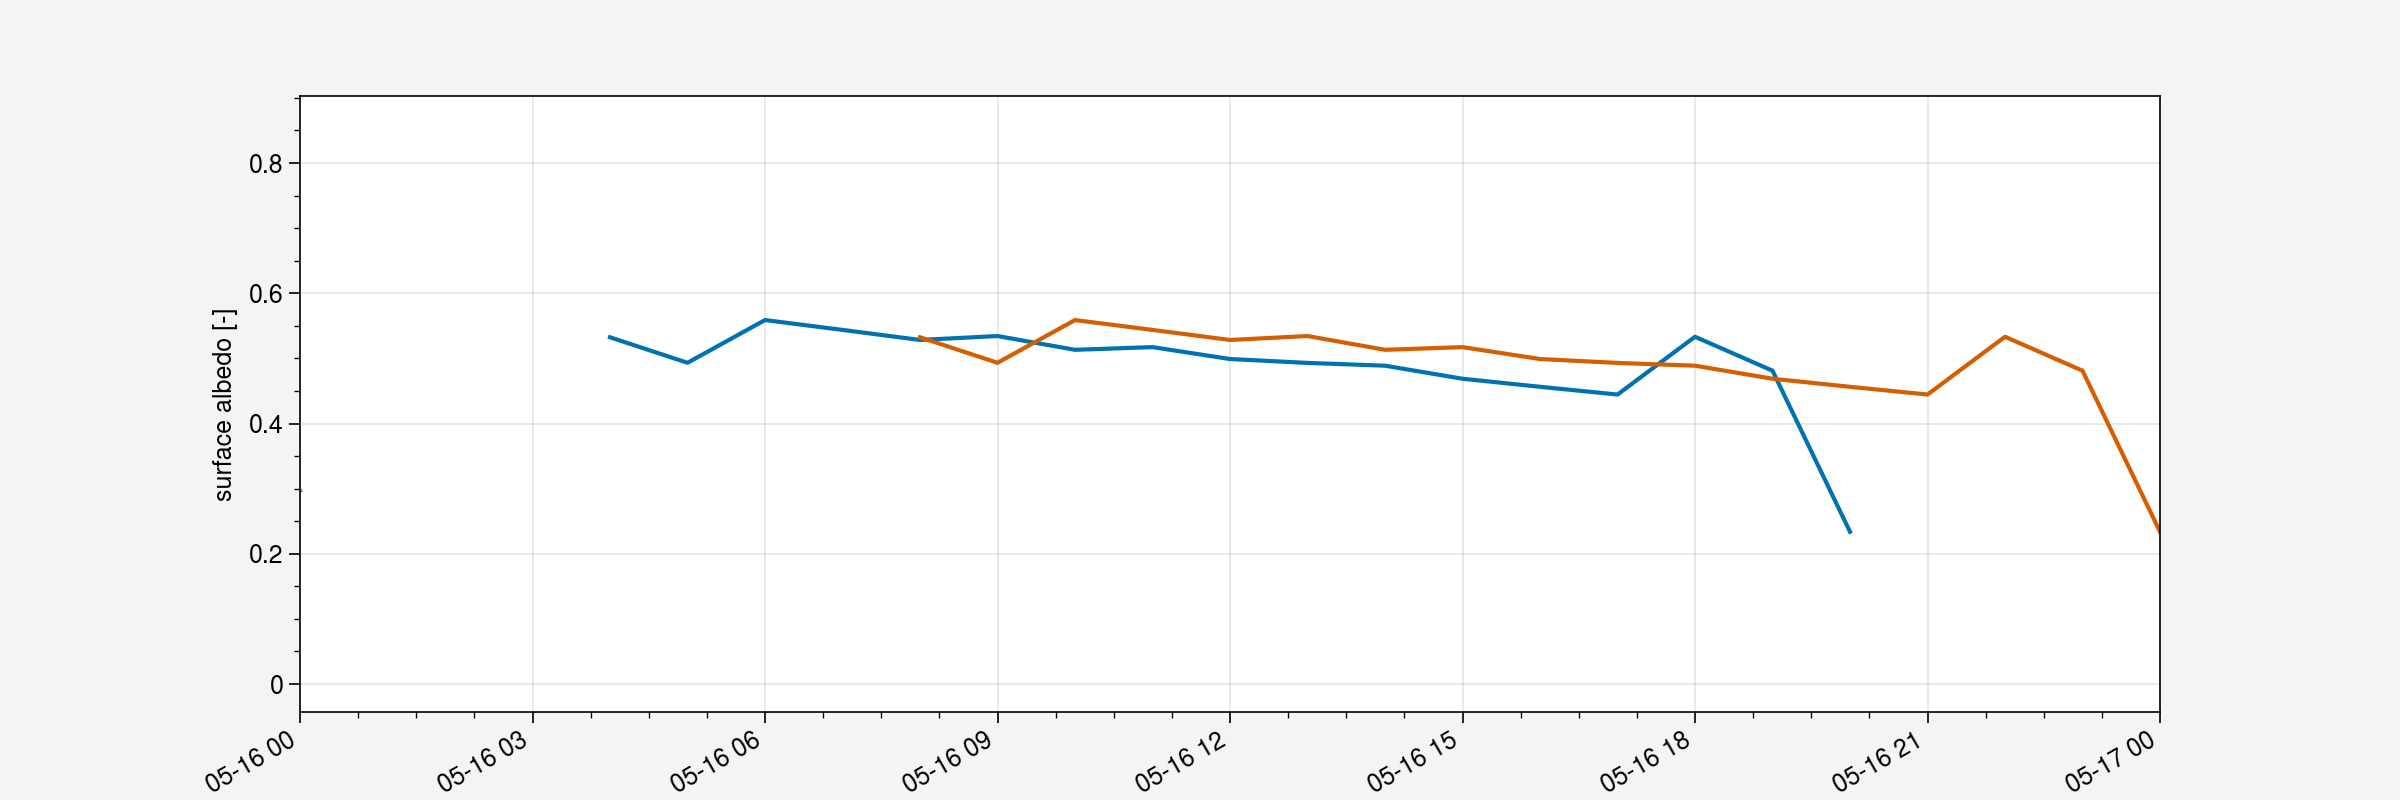

In [78]:
%matplotlib inline
ds_tundra_local.albs.plot(figsize=(12, 4))
ds_tundra.albs.plot()
plt.xlim(pd.to_datetime('2016-05-16'),pd.to_datetime('2016-05-17'))

(16937.0, 16938.0)

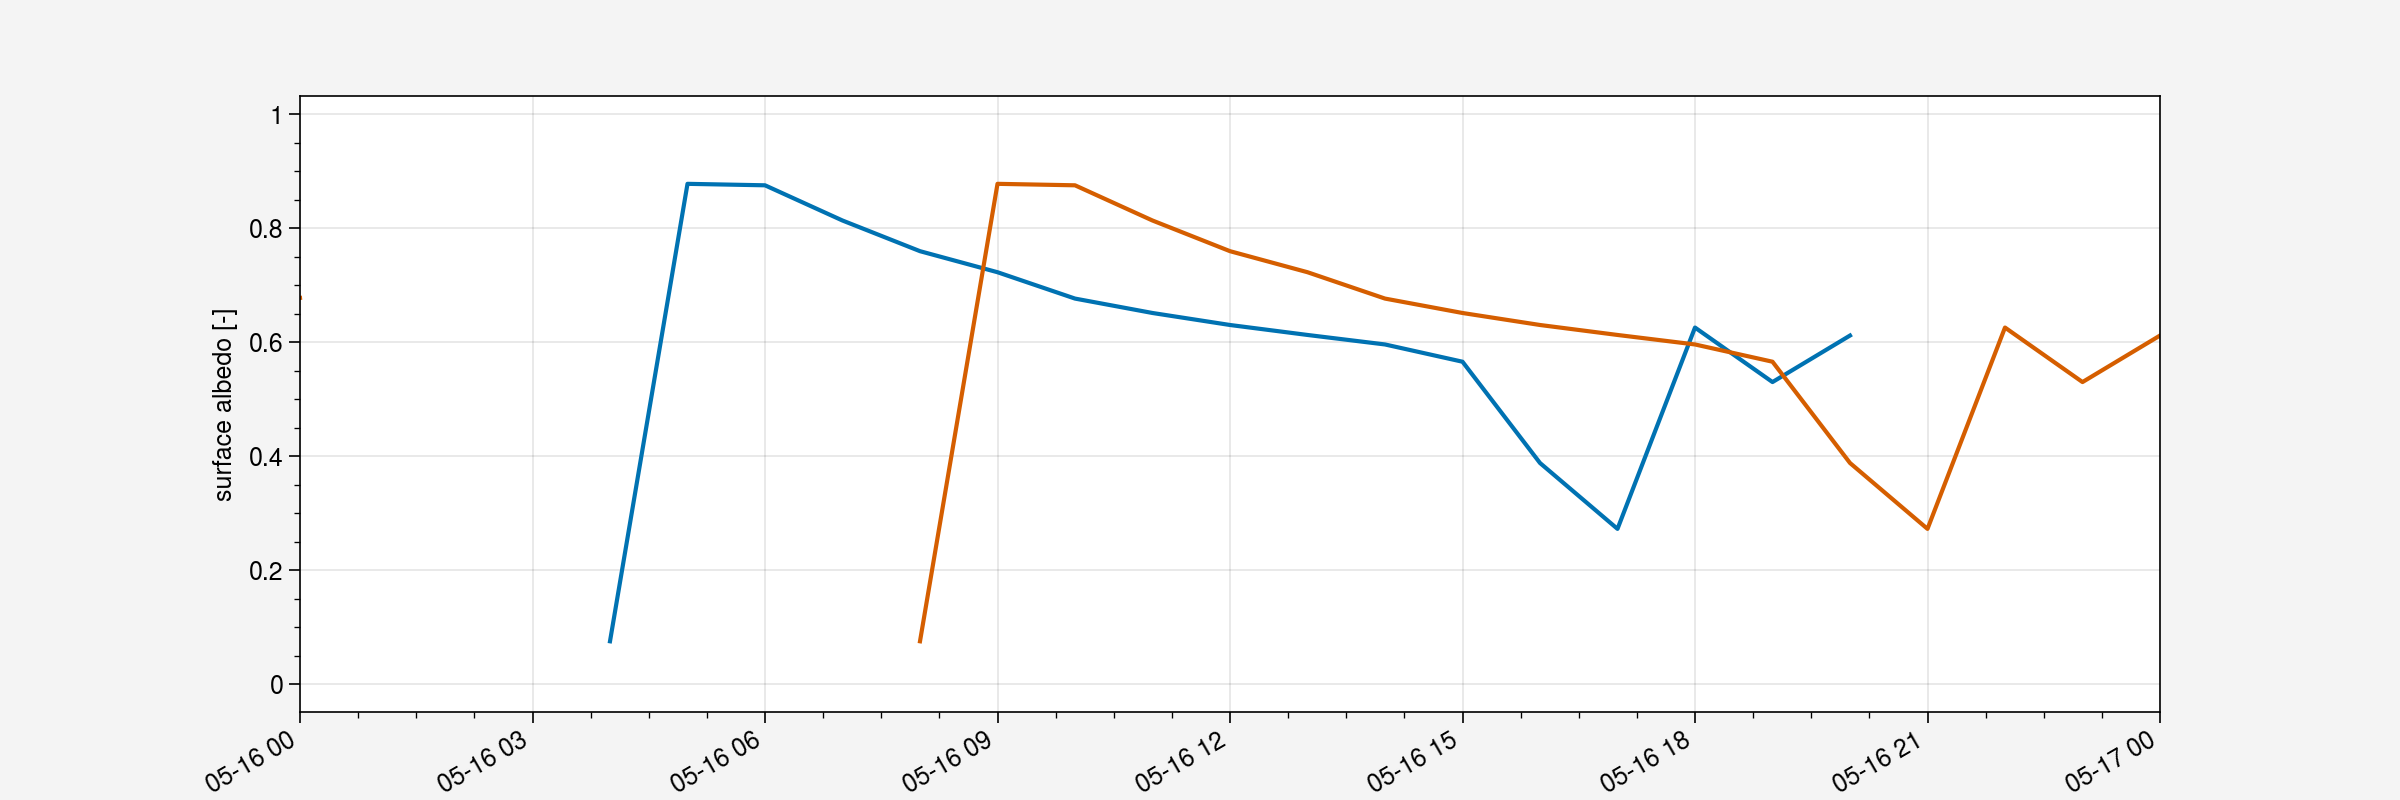

In [79]:
%matplotlib inline
ds_forest_local.albs.plot(figsize=(12, 4))
ds_forest.albs.plot()
plt.xlim(pd.to_datetime('2016-05-16'),pd.to_datetime('2016-05-17'))

In [80]:
path_obs

'/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets'

In [81]:
ds_forest_local.time

<xarray.DataArray 'time' (time: 53338)>
array(['2015-09-19T00:00:00.000000000', '2015-09-19T01:00:00.000000000',
       '2015-09-19T02:00:00.000000000', ..., '2021-10-19T07:00:00.000000000',
       '2021-10-19T08:00:00.000000000', '2021-10-19T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-09-19 ... 2021-10-19T09:00:00

In [82]:
ds_tundra_local.time

<xarray.DataArray 'time' (time: 79386)>
array(['2012-09-28T17:00:00.000000000', '2012-09-28T18:00:00.000000000',
       '2012-09-28T19:00:00.000000000', ..., '2021-10-19T08:00:00.000000000',
       '2021-10-19T09:00:00.000000000', '2021-10-19T10:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2012-09-28T17:00:00 ... 2021-10-19T10:00:00

In [84]:
ds_forest_local.to_netcdf(path_obs+'/obs_insitu_umf_2015_2021.nc')
ds_tundra_local.to_netcdf(path_obs+'/obs_insitu_umt_2012_2021.nc')